**Install and Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
from collections import Counter
from scipy import stats
import calendar
warnings.filterwarnings('ignore')

In [2]:
# Set up plotting style for better visualizations
plt.style.use('default')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

**Data Loading with Validation**

Set Data Path (files uploaded directly to Colab)

In [3]:
def load_and_validate_data():
    datasets = {}
    years = [2010, 2011, 2012, 2013, 2014]

    print("Loading and validating datasets...")
    for year in years:
        try:
            df = pd.read_csv(f'/content/Crime_Data_{year}.csv')
            datasets[year] = df

            # Validation
            print(f"{year}: {len(df):,} records")
            print(f"  Columns: {df.shape[1]}")
            print(f"  Missing data: {df.isnull().sum().sum():,}")
            print(f"  Duplicates: {df.duplicated().sum():,}")

        except FileNotFoundError:
            print(f"{year}: File not found")

    return datasets

yearly_data = load_and_validate_data()

Loading and validating datasets...
2010: 82,871 records
  Columns: 15
  Missing data: 4,865
  Duplicates: 0
2011: 86,013 records
  Columns: 15
  Missing data: 7,853
  Duplicates: 0
2012: 81,406 records
  Columns: 15
  Missing data: 8,933
  Duplicates: 0
2013: 77,127 records
  Columns: 15
  Missing data: 2,084
  Duplicates: 0
2014: 77,466 records
  Columns: 15
  Missing data: 1,992
  Duplicates: 0


**Data Quality Assessment**


DATA QUALITY ASSESSMENT

2010 Quality Report:
  Completeness: 99.6%
  Uniqueness: 100.0%
  Data types: {dtype('O'): 14, dtype('int64'): 1}

2011 Quality Report:
  Completeness: 99.4%
  Uniqueness: 100.0%
  Data types: {dtype('O'): 13, dtype('float64'): 1, dtype('int64'): 1}

2012 Quality Report:
  Completeness: 99.3%
  Uniqueness: 100.0%
  Data types: {dtype('O'): 13, dtype('float64'): 1, dtype('int64'): 1}

2013 Quality Report:
  Completeness: 99.8%
  Uniqueness: 100.0%
  Data types: {dtype('O'): 13, dtype('float64'): 1, dtype('int64'): 1}

2014 Quality Report:
  Completeness: 99.8%
  Uniqueness: 100.0%
  Data types: {dtype('O'): 14, dtype('int64'): 1}


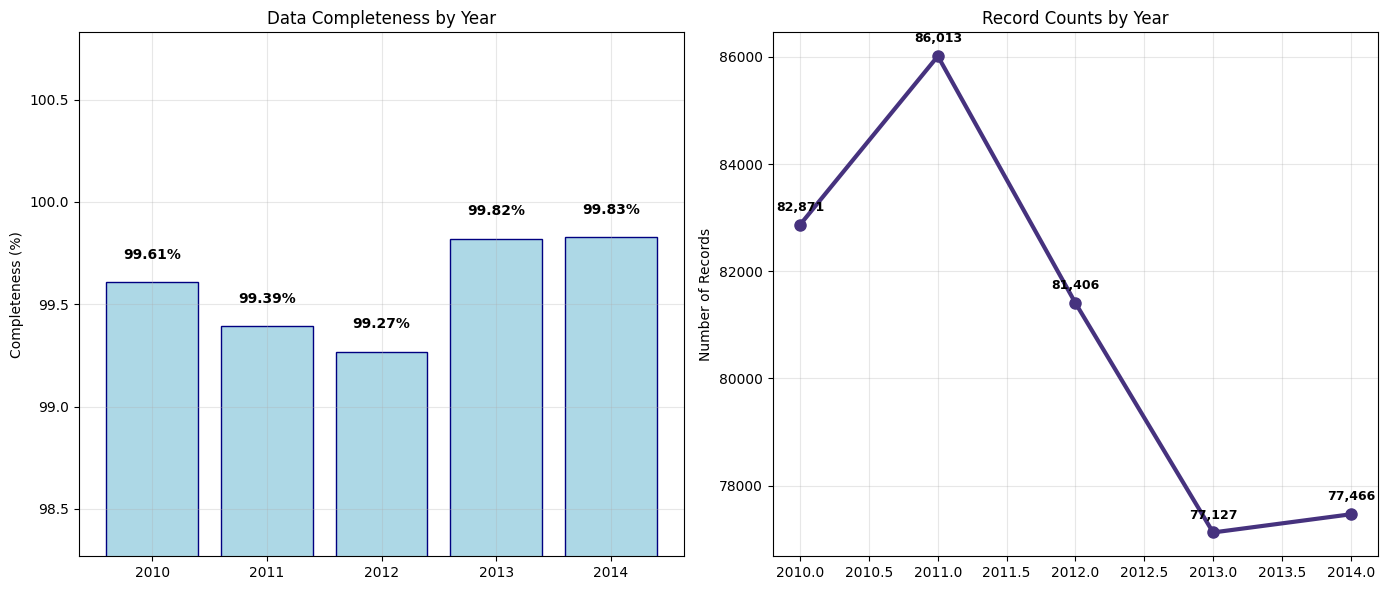

In [4]:
def assess_data_quality(datasets):
    print("\n" + "="*60)
    print("DATA QUALITY ASSESSMENT")
    print("="*60)

    quality_report = {}

    for year, data in datasets.items():
        report = {
            'total_records': len(data),
            'columns': data.shape[1],
            'missing_percentage': (data.isnull().sum().sum() / (len(data) * data.shape[1])) * 100,
            'duplicate_percentage': (data.duplicated().sum() / len(data)) * 100,
            'data_types': data.dtypes.value_counts().to_dict()
        }
        quality_report[year] = report

        print(f"\n{year} Quality Report:")
        print(f"  Completeness: {100-report['missing_percentage']:.1f}%")
        print(f"  Uniqueness: {100-report['duplicate_percentage']:.1f}%")
        print(f"  Data types: {report['data_types']}")

    # Visualize data quality
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Completeness by year
    years = list(quality_report.keys())
    completeness = [100 - quality_report[year]['missing_percentage'] for year in years]
    ax1.bar(years, completeness, color='lightblue', edgecolor='navy')
    ax1.set_title('Data Completeness by Year')
    ax1.set_ylabel('Completeness (%)')
    # Set y-axis to show small differences better
    if max(completeness) - min(completeness) < 5:  # If differences are small
        ax1.set_ylim([min(completeness) - 1, max(completeness) + 1])
    else:
        ax1.set_ylim([0, 100])

    # Add value labels on bars
    for i, (year, comp) in enumerate(zip(years, completeness)):
        ax1.text(year, comp + 0.1, f'{comp:.2f}%', ha='center', va='bottom', fontweight='bold')


    # Record counts by year
    record_counts = [quality_report[year]['total_records'] for year in years]
    ax2.plot(years, record_counts, marker='o', linewidth=3, markersize=8)
    ax2.set_title('Record Counts by Year')
    ax2.set_ylabel('Number of Records')

    for year, count in zip(years, record_counts):
      ax2.annotate(f'{count:,}', (year, count), textcoords="offset points",
                  xytext=(0,10), ha='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return quality_report

quality_report = assess_data_quality(yearly_data)

**Data Exploration**


ENHANCED DATA EXPLORATION
Detailed examination of 2010 data:
Shape: (82871, 15)

Column details:
  INCIDENT_NUMBER: 72,459 unique values, 0 nulls
  DATE_REPORTED: 67,088 unique values, 0 nulls
  DATE_OCCURED: 57,420 unique values, 73 nulls
  UOR_DESC: 499 unique values, 0 nulls
  CRIME_TYPE: 16 unique values, 0 nulls
  NIBRS_CODE: 52 unique values, 0 nulls
  UCR_HIERARCHY: 2 unique values, 3,545 nulls
  ATT_COMP: 2 unique values, 316 nulls
  LMPD_DIVISION: 9 unique values, 0 nulls
  LMPD_BEAT: 52 unique values, 146 nulls
  PREMISE_TYPE: 43 unique values, 473 nulls
  BLOCK_ADDRESS: 16,823 unique values, 0 nulls
  CITY: 136 unique values, 90 nulls
  ZIP_CODE: 80 unique values, 222 nulls
  ID: 82,871 unique values, 0 nulls

Sample records:
  INCIDENT_NUMBER        DATE_REPORTED         DATE_OCCURED  \
0    80-10-102885  2010-11-11 12:20:00  2010-10-28 20:00:00   
1    80-10-059633  2010-08-02 23:16:00  2010-08-02 23:16:00   
2    80-10-022882  2010-03-31 18:07:00  2010-03-31 18:07:00   


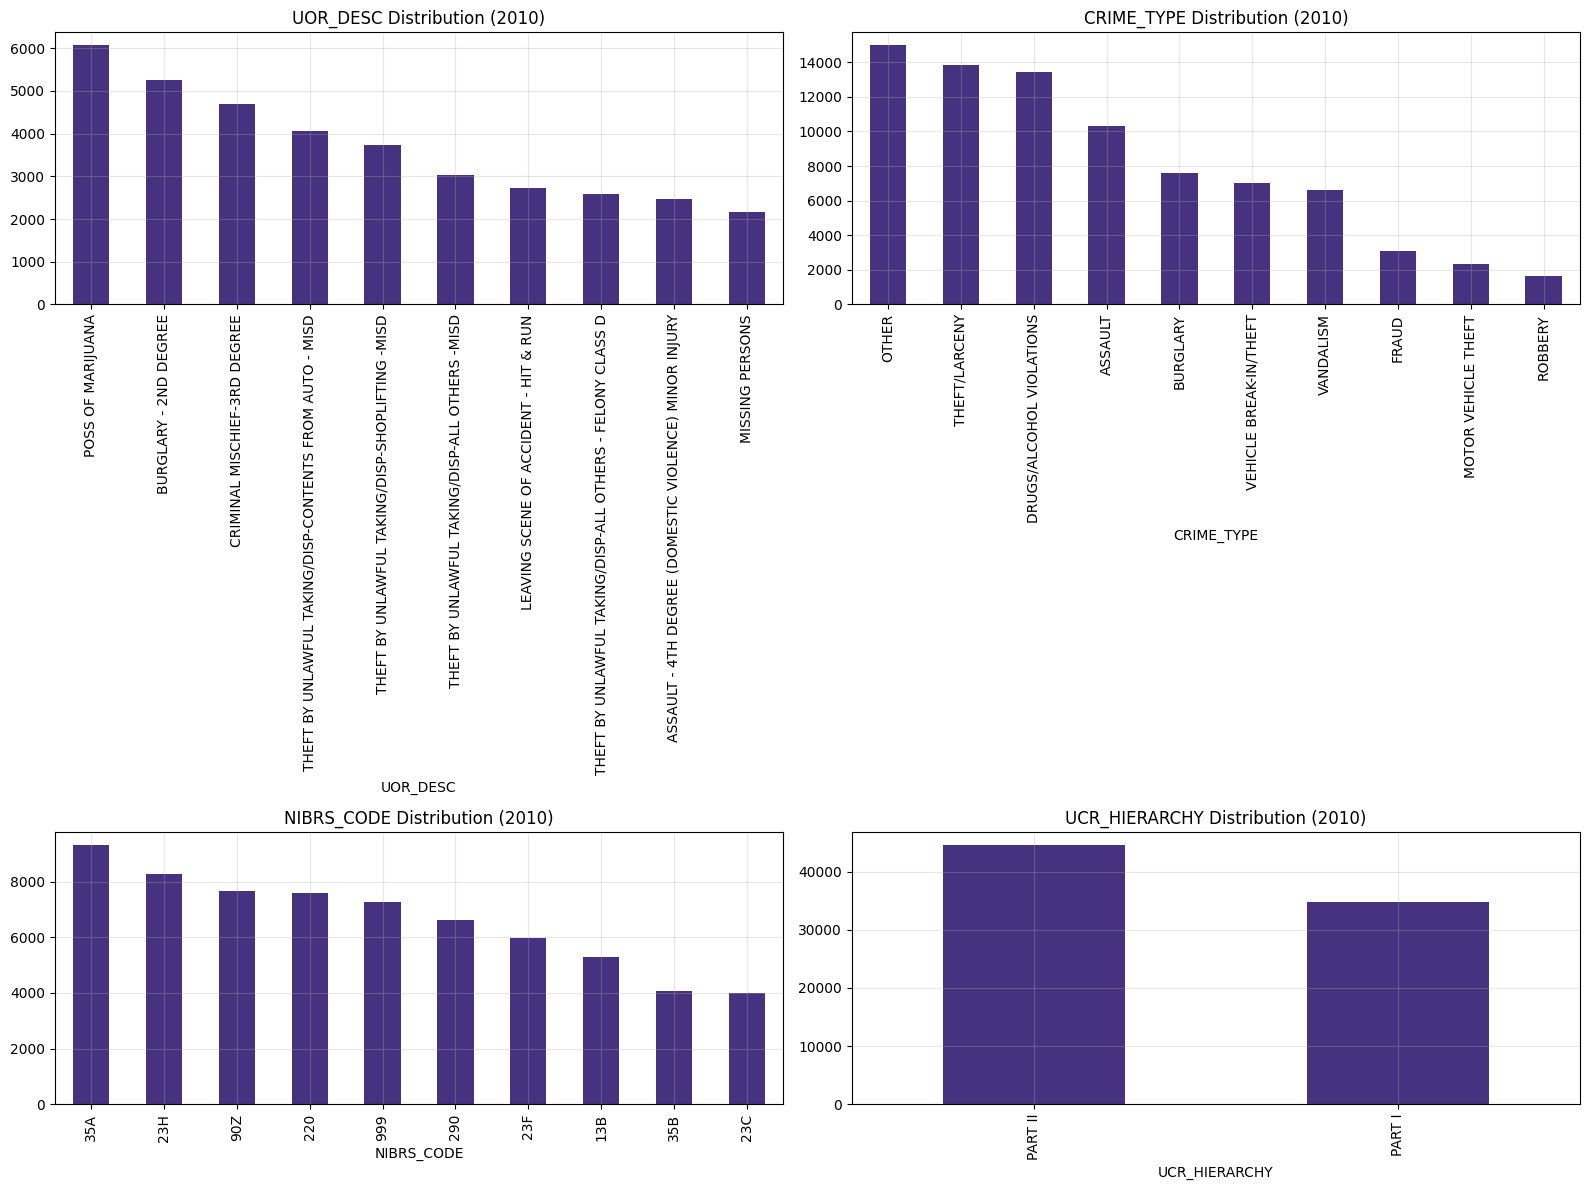

In [5]:
def enhanced_data_exploration(datasets):
    print("\n" + "="*60)
    print("ENHANCED DATA EXPLORATION")
    print("="*60)

    # Examine first available dataset in detail
    sample_year, sample_data = next(iter(datasets.items()))

    print(f"Detailed examination of {sample_year} data:")
    print(f"Shape: {sample_data.shape}")
    print(f"\nColumn details:")
    for col in sample_data.columns:
        unique_count = sample_data[col].nunique()
        null_count = sample_data[col].isnull().sum()
        print(f"  {col}: {unique_count:,} unique values, {null_count:,} nulls")

    print(f"\nSample records:")
    print(sample_data.head(3))

    # Check for categorical columns
    categorical_cols = []
    for col in sample_data.columns:
        if sample_data[col].dtype == 'object':
            unique_ratio = sample_data[col].nunique() / len(sample_data)
            if unique_ratio < 0.5:  # Less than 50% unique values
                categorical_cols.append(col)

    print(f"\nCategorical columns identified: {categorical_cols}")

    # Examine distributions of key categorical columns
    if categorical_cols:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()

        for i, col in enumerate(categorical_cols[:4]):
            if i < 4:
                value_counts = sample_data[col].value_counts().head(10)
                value_counts.plot(kind='bar', ax=axes[i])
                axes[i].set_title(f'{col} Distribution ({sample_year})')
                axes[i].tick_params(axis='x', rotation=90)

        plt.tight_layout()
        plt.show()

enhanced_data_exploration(yearly_data)

**Comprehensive Crime Type Analysis**


COMPREHENSIVE CRIME TYPE ANALYSIS
Total crimes (2010-2014): 404,883
Unique crime types: 16
Average crimes per type: 25,305

Crime concentration:
Top 5 crimes account for: 74.0% of all crimes
Top 10 crimes account for: 97.5% of all crimes

Top 15 crime types:
 1. THEFT/LARCENY: 77,317 (19.1%)
 2. DRUGS/ALCOHOL VIOLATIONS: 72,432 (17.9%)
 3. ASSAULT: 58,004 (14.3%)
 4. OTHER: 55,295 (13.7%)
 5. BURGLARY: 36,449 (9.0%)
 6. VANDALISM: 29,860 (7.4%)
 7. VEHICLE BREAK-IN/THEFT: 29,110 (7.2%)
 8. FRAUD: 16,193 (4.0%)
 9. MOTOR VEHICLE THEFT: 12,174 (3.0%)
10. ROBBERY: 7,806 (1.9%)
11. WEAPONS: 3,865 (1.0%)
12. SEX CRIMES: 3,338 (0.8%)
13. DISTURBING THE PEACE: 2,648 (0.7%)
14. HOMICIDE: 295 (0.1%)
15. DUI: 58 (0.0%)


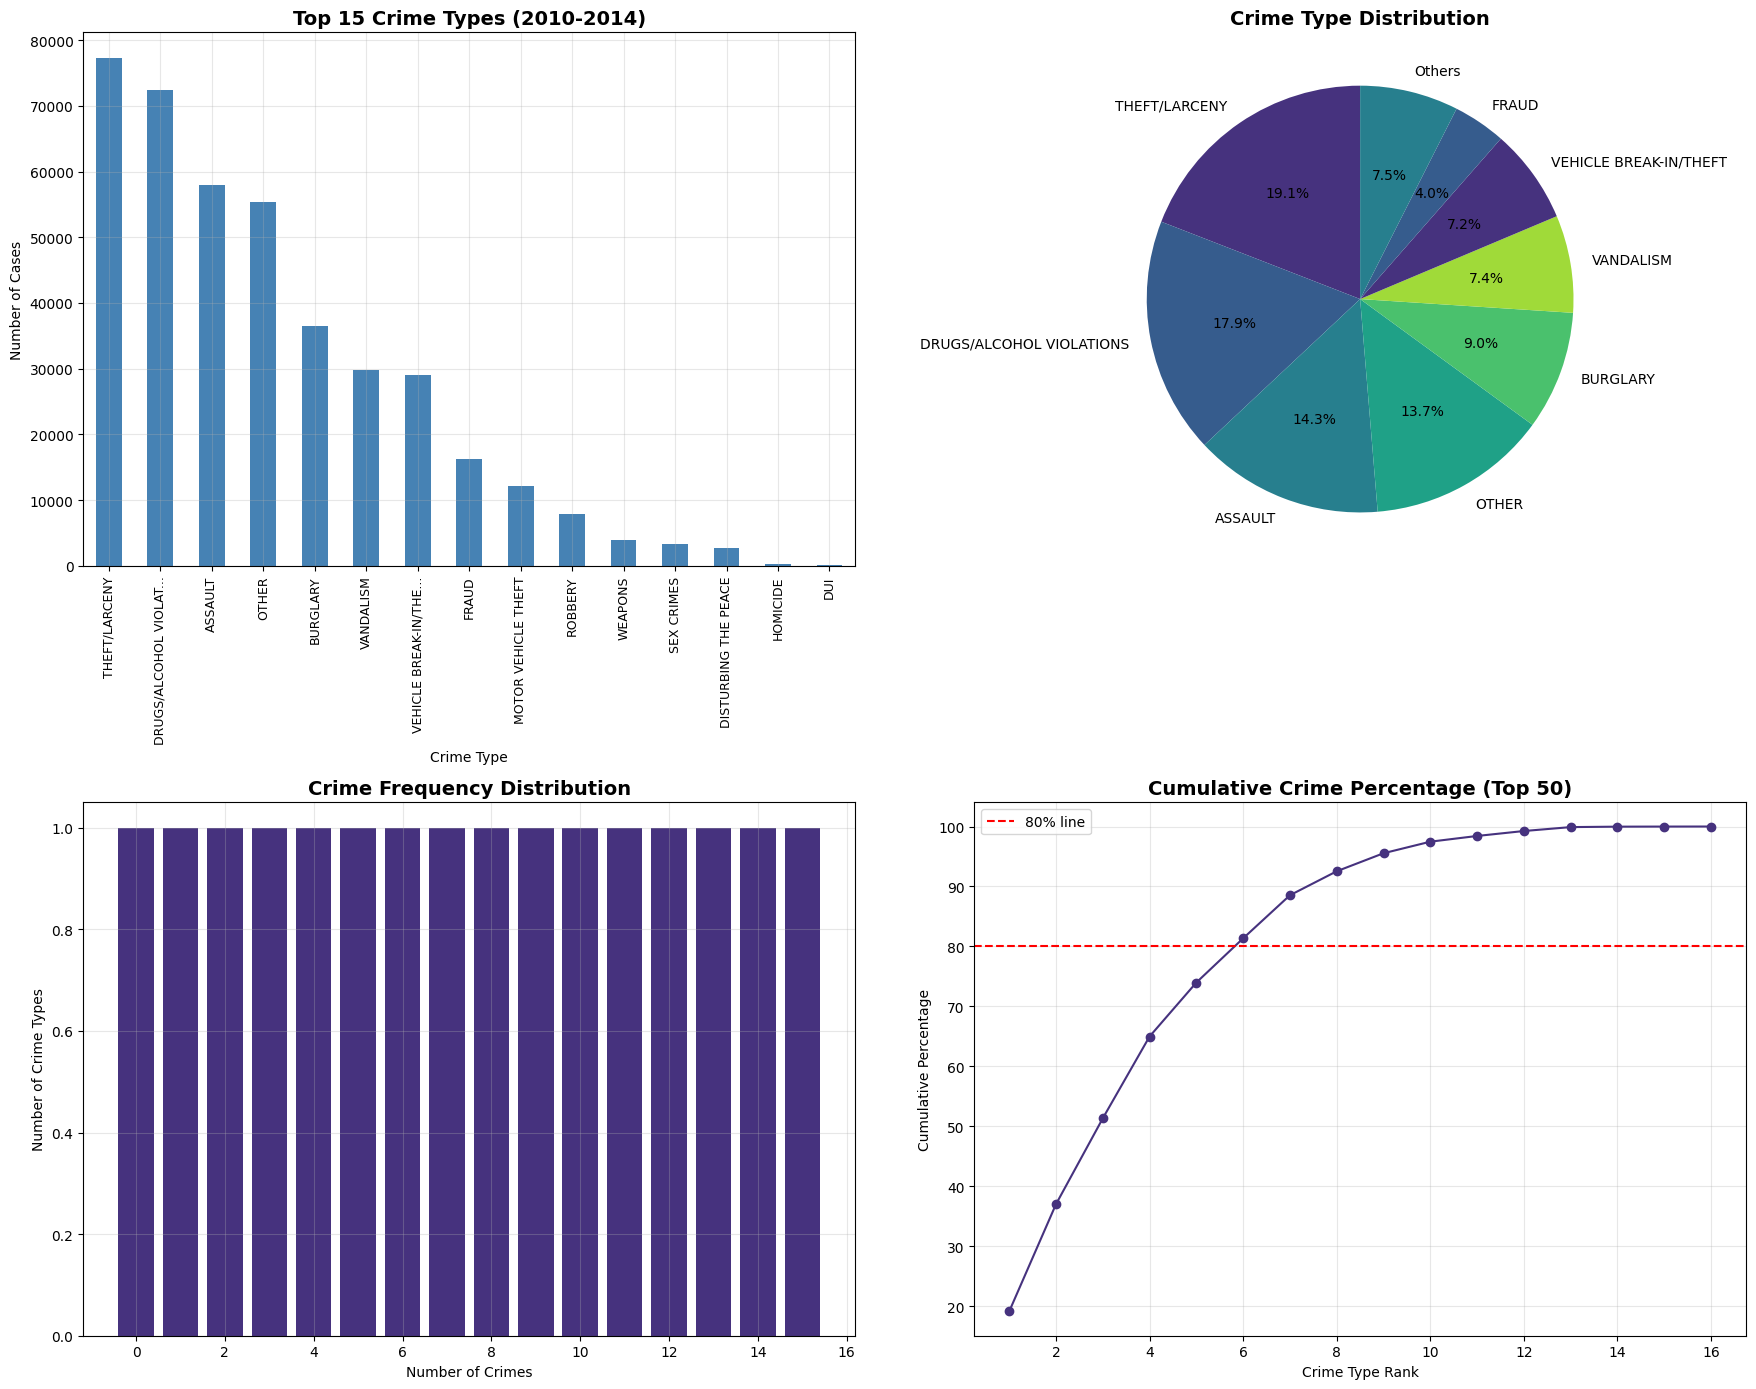

In [6]:
def comprehensive_crime_analysis(datasets):
    print("\n" + "="*60)
    print("COMPREHENSIVE CRIME TYPE ANALYSIS")
    print("="*60)

    # Combine all years for comprehensive analysis
    all_data = []
    for year, data in datasets.items():
        data_copy = data.copy()
        data_copy['YEAR'] = year
        all_data.append(data_copy)

    combined = pd.concat(all_data, ignore_index=True)

    if 'CRIME_TYPE' not in combined.columns:
        print("CRIME_TYPE column not found")
        return

    # Overall crime statistics
    total_crimes = len(combined)
    unique_crime_types = combined['CRIME_TYPE'].nunique()
    crime_counts = combined['CRIME_TYPE'].value_counts()

    print(f"Total crimes (2010-2014): {total_crimes:,}")
    print(f"Unique crime types: {unique_crime_types}")
    print(f"Average crimes per type: {total_crimes // unique_crime_types:,}")

    # Crime concentration analysis
    top_5_percentage = (crime_counts.head(5).sum() / total_crimes) * 100
    top_10_percentage = (crime_counts.head(10).sum() / total_crimes) * 100

    print(f"\nCrime concentration:")
    print(f"Top 5 crimes account for: {top_5_percentage:.1f}% of all crimes")
    print(f"Top 10 crimes account for: {top_10_percentage:.1f}% of all crimes")

    # Detailed breakdown
    print(f"\nTop 15 crime types:")
    for i, (crime, count) in enumerate(crime_counts.head(15).items(), 1):
        percentage = (count / total_crimes) * 100
        print(f"{i:2}. {crime}: {count:,} ({percentage:.1f}%)")

    # Advanced visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

    # 1. Top 15 crimes bar chart
    crime_counts.head(15).plot(kind='bar', ax=ax1, color='steelblue')
    ax1.set_title('Top 15 Crime Types (2010-2014)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Crime Type')
    ax1.set_ylabel('Number of Cases')

    # Fix x-axis labels
    crime_labels = [label[:20] + '...' if len(label) > 20 else label for label in crime_counts.head(15).index]
    ax1.set_xticklabels(crime_labels, rotation=90, ha='center', fontsize=9)

    # 2. Crime distribution pie chart
    top_crimes = crime_counts.head(8)
    others = crime_counts.iloc[8:].sum()
    pie_data = list(top_crimes.values) + [others]
    pie_labels = list(top_crimes.index) + ['Others']
    ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Crime Type Distribution', fontsize=14, fontweight='bold')

    # 3. Crime frequency distribution
    crime_freq_dist = crime_counts.value_counts().sort_index()
    ax3.bar(range(len(crime_freq_dist)), crime_freq_dist.values)
    ax3.set_title('Crime Frequency Distribution', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Number of Crimes')
    ax3.set_ylabel('Number of Crime Types')

    # 4. Cumulative percentage
    cumulative_pct = (crime_counts.cumsum() / total_crimes * 100)
    ax4.plot(range(1, min(51, len(cumulative_pct)+1)), cumulative_pct.head(50), marker='o')
    ax4.set_title('Cumulative Crime Percentage (Top 50)', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Crime Type Rank')
    ax4.set_ylabel('Cumulative Percentage')
    ax4.axhline(y=80, color='red', linestyle='--', label='80% line')
    ax4.legend()

    plt.tight_layout()
    plt.show()

    return combined

combined_data = comprehensive_crime_analysis(yearly_data)

**Temporal Analysis**


ADVANCED TEMPORAL ANALYSIS
Date columns found: ['DATE_REPORTED', 'DATE_OCCURED']
Successfully parsed 404,722 dates

Peak crime hours:
  00:00 - 28,097 crimes
  17:00 - 23,482 crimes
  16:00 - 23,370 crimes
  20:00 - 22,905 crimes
  18:00 - 22,874 crimes

Crimes by day of week:
  Monday: 55,891
  Tuesday: 57,909
  Wednesday: 59,881
  Thursday: 59,848
  Friday: 61,766
  Saturday: 57,396
  Sunday: 52,031

Seasonal patterns (by month):
  January: 32,334
  February: 27,561
  March: 32,988
  April: 33,884
  May: 36,021
  June: 35,849
  July: 36,801
  August: 36,530
  September: 34,560
  October: 34,960
  November: 31,759
  December: 31,475


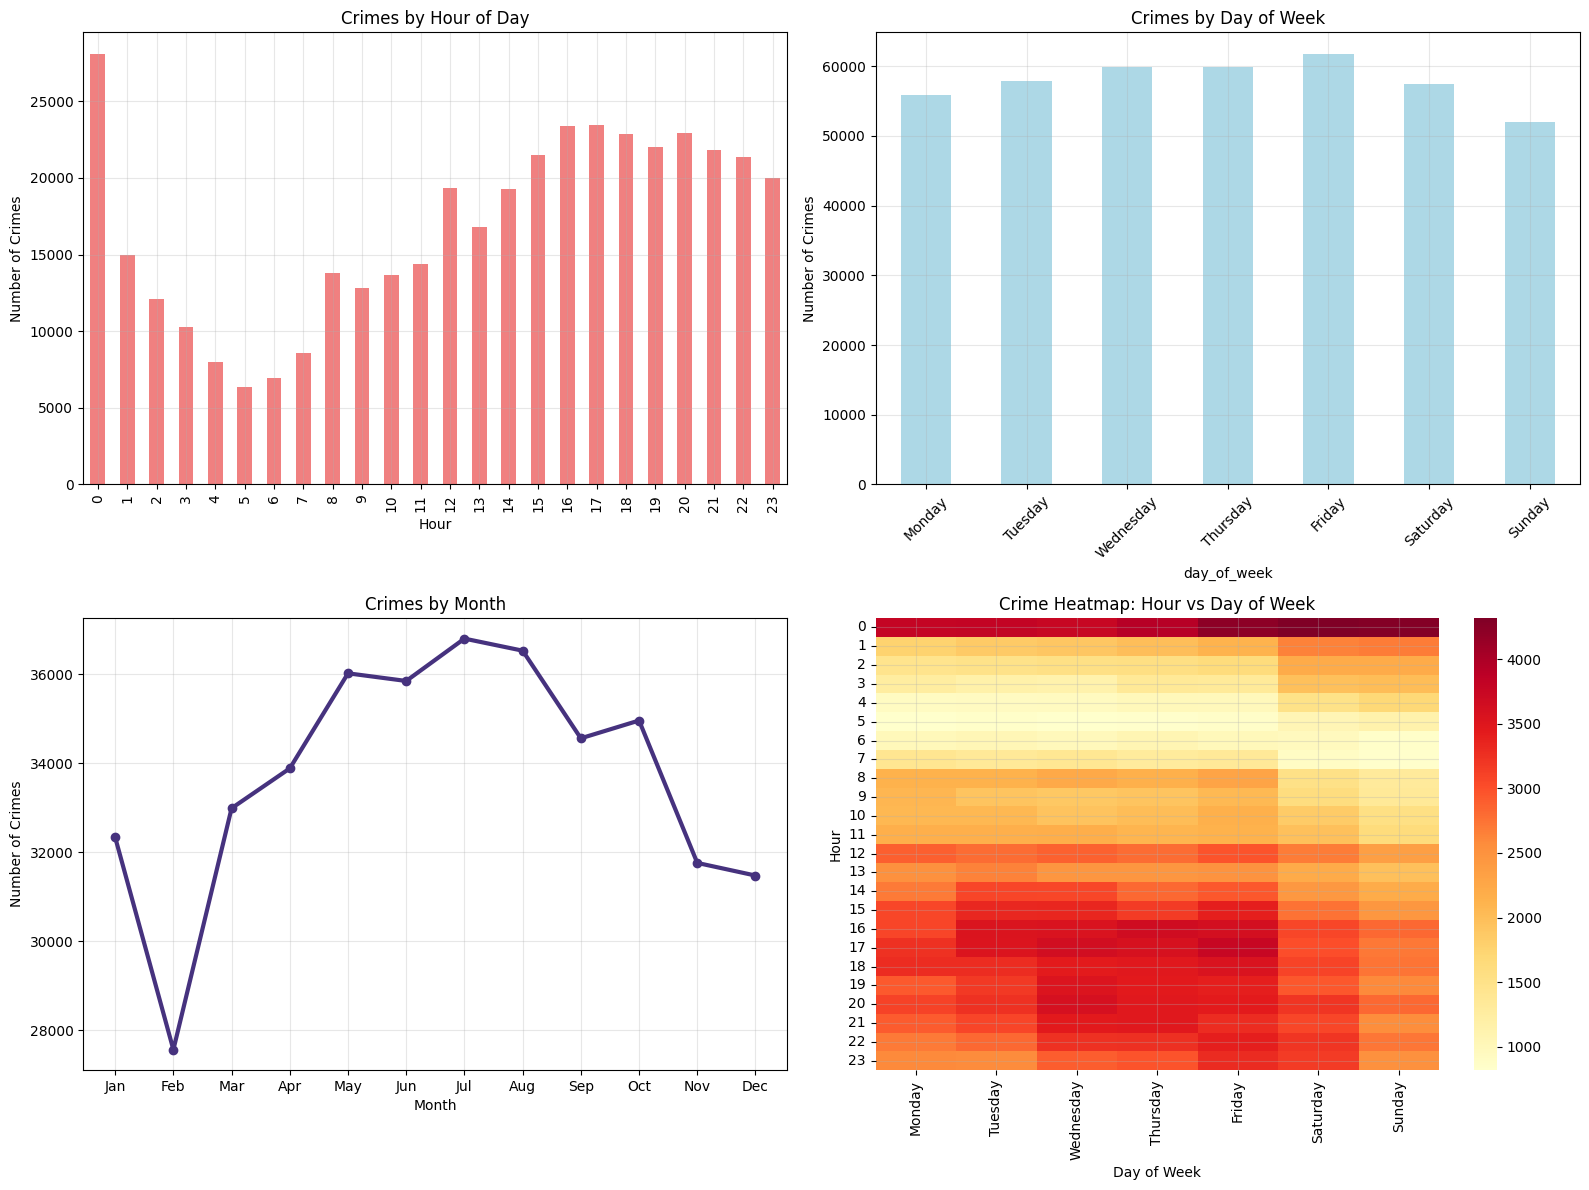

In [7]:
def advanced_temporal_analysis(combined_data):
    print("\n" + "="*60)
    print("ADVANCED TEMPORAL ANALYSIS")
    print("="*60)

    # Parse dates if available
    date_columns = [col for col in combined_data.columns if 'DATE' in col.upper()]
    print(f"Date columns found: {date_columns}")

    if 'DATE_OCCURED' in combined_data.columns:
        # Try to parse the date
        combined_data['datetime'] = pd.to_datetime(combined_data['DATE_OCCURED'], errors='coerce')
        valid_dates = combined_data.dropna(subset=['datetime'])

        if len(valid_dates) > 0:
            print(f"Successfully parsed {len(valid_dates):,} dates")

            # Extract time components
            valid_dates['hour'] = valid_dates['datetime'].dt.hour
            valid_dates['day_of_week'] = valid_dates['datetime'].dt.day_name()
            valid_dates['month'] = valid_dates['datetime'].dt.month
            valid_dates['quarter'] = valid_dates['datetime'].dt.quarter

            # Hourly patterns
            hourly_crimes = valid_dates['hour'].value_counts().sort_index()
            print(f"\nPeak crime hours:")
            peak_hours = hourly_crimes.nlargest(5)
            for hour, count in peak_hours.items():
                print(f"  {hour:02d}:00 - {count:,} crimes")

            # Day of week patterns
            day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            daily_crimes = valid_dates['day_of_week'].value_counts().reindex(day_order)
            print(f"\nCrimes by day of week:")
            for day, count in daily_crimes.items():
                print(f"  {day}: {count:,}")

            # Seasonal patterns
            monthly_crimes = valid_dates['month'].value_counts().sort_index()
            print(f"\nSeasonal patterns (by month):")
            for month, count in monthly_crimes.items():
                month_name = calendar.month_name[month]
                print(f"  {month_name}: {count:,}")

            # Visualizations
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

            # Hourly pattern
            hourly_crimes.plot(kind='bar', ax=ax1, color='lightcoral')
            ax1.set_title('Crimes by Hour of Day')
            ax1.set_xlabel('Hour')
            ax1.set_ylabel('Number of Crimes')

            # Daily pattern
            daily_crimes.plot(kind='bar', ax=ax2, color='lightblue')
            ax2.set_title('Crimes by Day of Week')
            ax2.set_ylabel('Number of Crimes')
            ax2.tick_params(axis='x', rotation=45)

            # Monthly pattern
            monthly_crimes.plot(kind='line', marker='o', ax=ax3, linewidth=3)
            ax3.set_title('Crimes by Month')
            ax3.set_xlabel('Month')
            ax3.set_ylabel('Number of Crimes')
            ax3.set_xticks(range(1, 13))
            ax3.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

            # Heatmap of hour vs day of week
            hour_day_pivot = valid_dates.groupby(['hour', 'day_of_week']).size().unstack(fill_value=0)
            hour_day_pivot = hour_day_pivot.reindex(columns=day_order)
            sns.heatmap(hour_day_pivot, ax=ax4, cmap='YlOrRd', annot=False)
            ax4.set_title('Crime Heatmap: Hour vs Day of Week')
            ax4.set_xlabel('Day of Week')
            ax4.set_ylabel('Hour')

            plt.tight_layout()
            plt.show()

            return valid_dates

    # Year-over-year analysis
    yearly_counts = combined_data['YEAR'].value_counts().sort_index()
    print(f"\nYear-over-year changes:")
    for i in range(1, len(yearly_counts)):
        current_year = yearly_counts.index[i]
        previous_year = yearly_counts.index[i-1]
        change = yearly_counts.iloc[i] - yearly_counts.iloc[i-1]
        change_pct = (change / yearly_counts.iloc[i-1]) * 100
        print(f"  {previous_year} to {current_year}: {change:+,} ({change_pct:+.1f}%)")

temporal_data = advanced_temporal_analysis(combined_data)

**Geographic Deep Dive**


GEOGRAPHIC DEEP DIVE ANALYSIS
Geographic distribution:
Total ZIP codes: 98
Average crimes per ZIP: 4,131

Geographic concentration:
Top 10 ZIP codes: 44.0% of all crimes
Top 20 ZIP codes: 67.9% of all crimes

Top 15 ZIP codes by crime count:
 1. ZIP 40203.0: 23,598 crimes (5.8%)
 2. ZIP 40214.0: 23,064 crimes (5.7%)
 3. ZIP 40211.0: 21,854 crimes (5.4%)
 4. ZIP 40219.0: 19,560 crimes (4.8%)
 5. ZIP 40212.0: 16,514 crimes (4.1%)
 6. ZIP 40215.0: 15,618 crimes (3.9%)
 7. ZIP 40272.0: 15,475 crimes (3.8%)
 8. ZIP 40218.0: 14,495 crimes (3.6%)
 9. ZIP 40216.0: 14,041 crimes (3.5%)
10. ZIP 40202.0: 13,870 crimes (3.4%)
11. ZIP 40210.0: 13,386 crimes (3.3%)
12. ZIP 40208.0: 11,726 crimes (2.9%)
13. ZIP 40258.0: 11,603 crimes (2.9%)
14. ZIP 40204.0: 9,997 crimes (2.5%)
15. ZIP 40213.0: 9,379 crimes (2.3%)

Crime density categories:
High crime ZIP codes (≥75th percentile): 25
Medium crime ZIP codes (25th-75th percentile): 24
Low crime ZIP codes (<25th percentile): 49


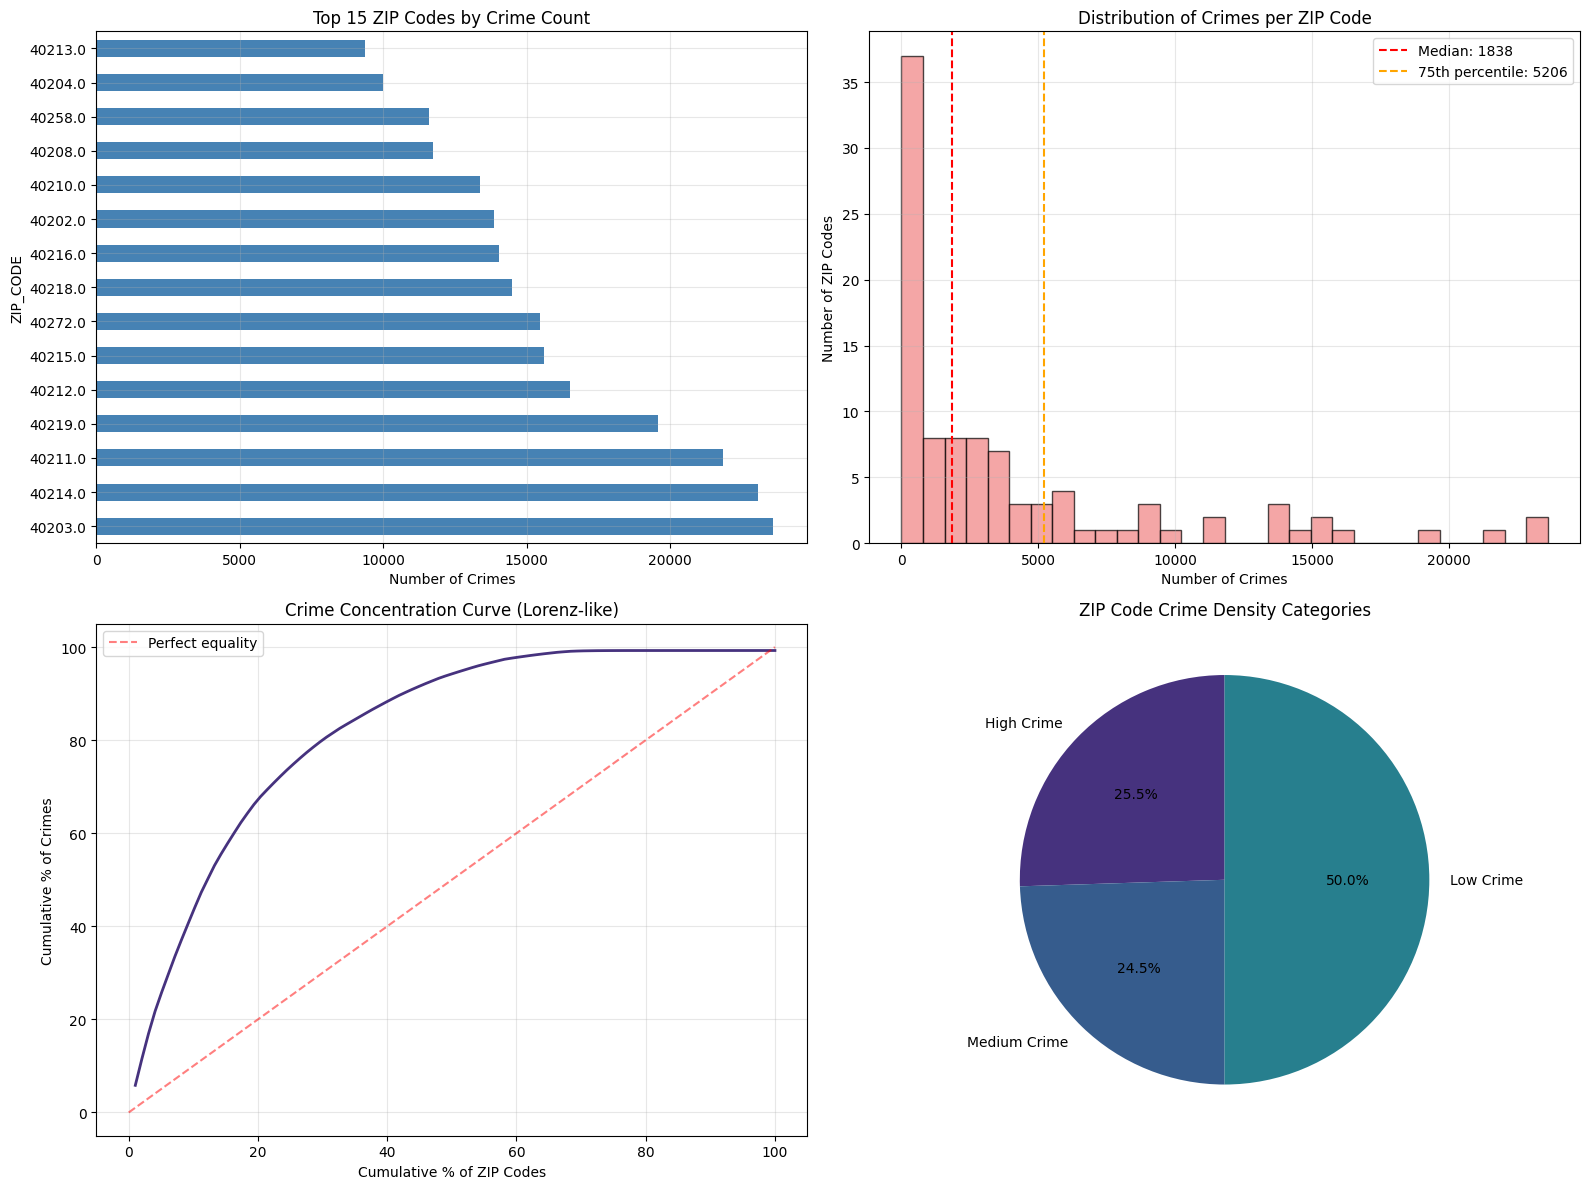


City-level analysis:
Total cities: 180

Top 10 cities by crime count:
 1. LOUISVILLE: 357,997 crimes (88.4%)
 2. LVIL: 28,395 crimes (7.0%)
 3. LYNDON: 2,006 crimes (0.5%)
 4. MIDDLETOWN: 1,955 crimes (0.5%)
 5. WEST_BUECHEL: 1,223 crimes (0.3%)
 6. SHIVELY: 941 crimes (0.2%)
 7. WATTERSON_PARK: 660 crimes (0.2%)
 8. ST_MATTHEWS: 582 crimes (0.1%)
 9. HURSTBOURNE: 569 crimes (0.1%)
10. JEFFERSONTOWN: 453 crimes (0.1%)


In [8]:
def geographic_deep_dive(combined_data):
    print("\n" + "="*60)
    print("GEOGRAPHIC DEEP DIVE ANALYSIS")
    print("="*60)

    # ZIP code analysis
    if 'ZIP_CODE' in combined_data.columns:
        zip_analysis = combined_data['ZIP_CODE'].value_counts()
        total_crimes = len(combined_data)

        print(f"Geographic distribution:")
        print(f"Total ZIP codes: {len(zip_analysis)}")
        print(f"Average crimes per ZIP: {total_crimes // len(zip_analysis):,}")

        # Concentration analysis
        top_10_zips_pct = (zip_analysis.head(10).sum() / total_crimes) * 100
        top_20_zips_pct = (zip_analysis.head(20).sum() / total_crimes) * 100

        print(f"\nGeographic concentration:")
        print(f"Top 10 ZIP codes: {top_10_zips_pct:.1f}% of all crimes")
        print(f"Top 20 ZIP codes: {top_20_zips_pct:.1f}% of all crimes")

        print(f"\nTop 15 ZIP codes by crime count:")
        for i, (zip_code, count) in enumerate(zip_analysis.head(15).items(), 1):
            percentage = (count / total_crimes) * 100
            print(f"{i:2}. ZIP {zip_code}: {count:,} crimes ({percentage:.1f}%)")

        # Crime density categories
        zip_counts = zip_analysis.values
        q1, q2, q3 = np.percentile(zip_counts, [25, 50, 75])

        high_crime = (zip_counts >= q3).sum()
        medium_crime = ((zip_counts >= q2) & (zip_counts < q3)).sum()
        low_crime = (zip_counts < q2).sum()

        print(f"\nCrime density categories:")
        print(f"High crime ZIP codes (≥75th percentile): {high_crime}")
        print(f"Medium crime ZIP codes (25th-75th percentile): {medium_crime}")
        print(f"Low crime ZIP codes (<25th percentile): {low_crime}")

        # Visualizations
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Top ZIP codes
        zip_analysis.head(15).plot(kind='barh', ax=ax1, color='steelblue')
        ax1.set_title('Top 15 ZIP Codes by Crime Count')
        ax1.set_xlabel('Number of Crimes')

        # ZIP code distribution
        ax2.hist(zip_counts, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
        ax2.axvline(q2, color='red', linestyle='--', label=f'Median: {q2:.0f}')
        ax2.axvline(q3, color='orange', linestyle='--', label=f'75th percentile: {q3:.0f}')
        ax2.set_title('Distribution of Crimes per ZIP Code')
        ax2.set_xlabel('Number of Crimes')
        ax2.set_ylabel('Number of ZIP Codes')
        ax2.legend()

        # Crime concentration curve
        cumulative_crimes = zip_analysis.cumsum()
        cumulative_pct = (cumulative_crimes / total_crimes) * 100
        zip_pct = np.arange(1, len(cumulative_pct) + 1) / len(cumulative_pct) * 100

        ax3.plot(zip_pct, cumulative_pct, linewidth=2)
        ax3.plot([0, 100], [0, 100], 'r--', alpha=0.5, label='Perfect equality')
        ax3.set_title('Crime Concentration Curve (Lorenz-like)')
        ax3.set_xlabel('Cumulative % of ZIP Codes')
        ax3.set_ylabel('Cumulative % of Crimes')
        ax3.legend()

        # Density categories pie chart
        categories = ['High Crime', 'Medium Crime', 'Low Crime']
        values = [high_crime, medium_crime, low_crime]
        ax4.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
        ax4.set_title('ZIP Code Crime Density Categories')

        plt.tight_layout()
        plt.show()

    # City analysis
    if 'CITY' in combined_data.columns:
        city_analysis = combined_data['CITY'].value_counts()
        print(f"\nCity-level analysis:")
        print(f"Total cities: {len(city_analysis)}")
        print(f"\nTop 10 cities by crime count:")
        for i, (city, count) in enumerate(city_analysis.head(10).items(), 1):
            percentage = (count / len(combined_data)) * 100
            print(f"{i:2}. {city}: {count:,} crimes ({percentage:.1f}%)")

geographic_deep_dive(combined_data)

**Crime Pattern Mining**


CRIME PATTERN MINING
Crime type trends (average annual growth rate):

Fastest growing crime types:
  ARSON: +68.6% per year
  WEAPONS: +5.3% per year
  ASSAULT: +4.0% per year
  FRAUD: +3.9% per year
  HOMICIDE: +3.7% per year
  THEFT/LARCENY: +3.7% per year
  DUI: +2.4% per year
  DRUGS/ALCOHOL VIOLATIONS: +1.9% per year

Fastest declining crime types:
  MOTOR VEHICLE THEFT: +1.9% per year
  ROBBERY: -0.4% per year
  SEX CRIMES: -0.6% per year
  DISTURBING THE PEACE: -2.3% per year
  BURGLARY: -2.7% per year
  VANDALISM: -3.6% per year
  VEHICLE BREAK-IN/THEFT: -6.5% per year
  OTHER: -11.5% per year

Most volatile crime types (highest year-to-year variation):
  ARSON: 114.2% volatility
  DUI: 44.0% volatility
  HOMICIDE: 21.7% volatility
  OTHER: 19.2% volatility
  WEAPONS: 17.5% volatility
  DISTURBING THE PEACE: 12.4% volatility
  ASSAULT: 11.6% volatility
  DRUGS/ALCOHOL VIOLATIONS: 10.3% volatility


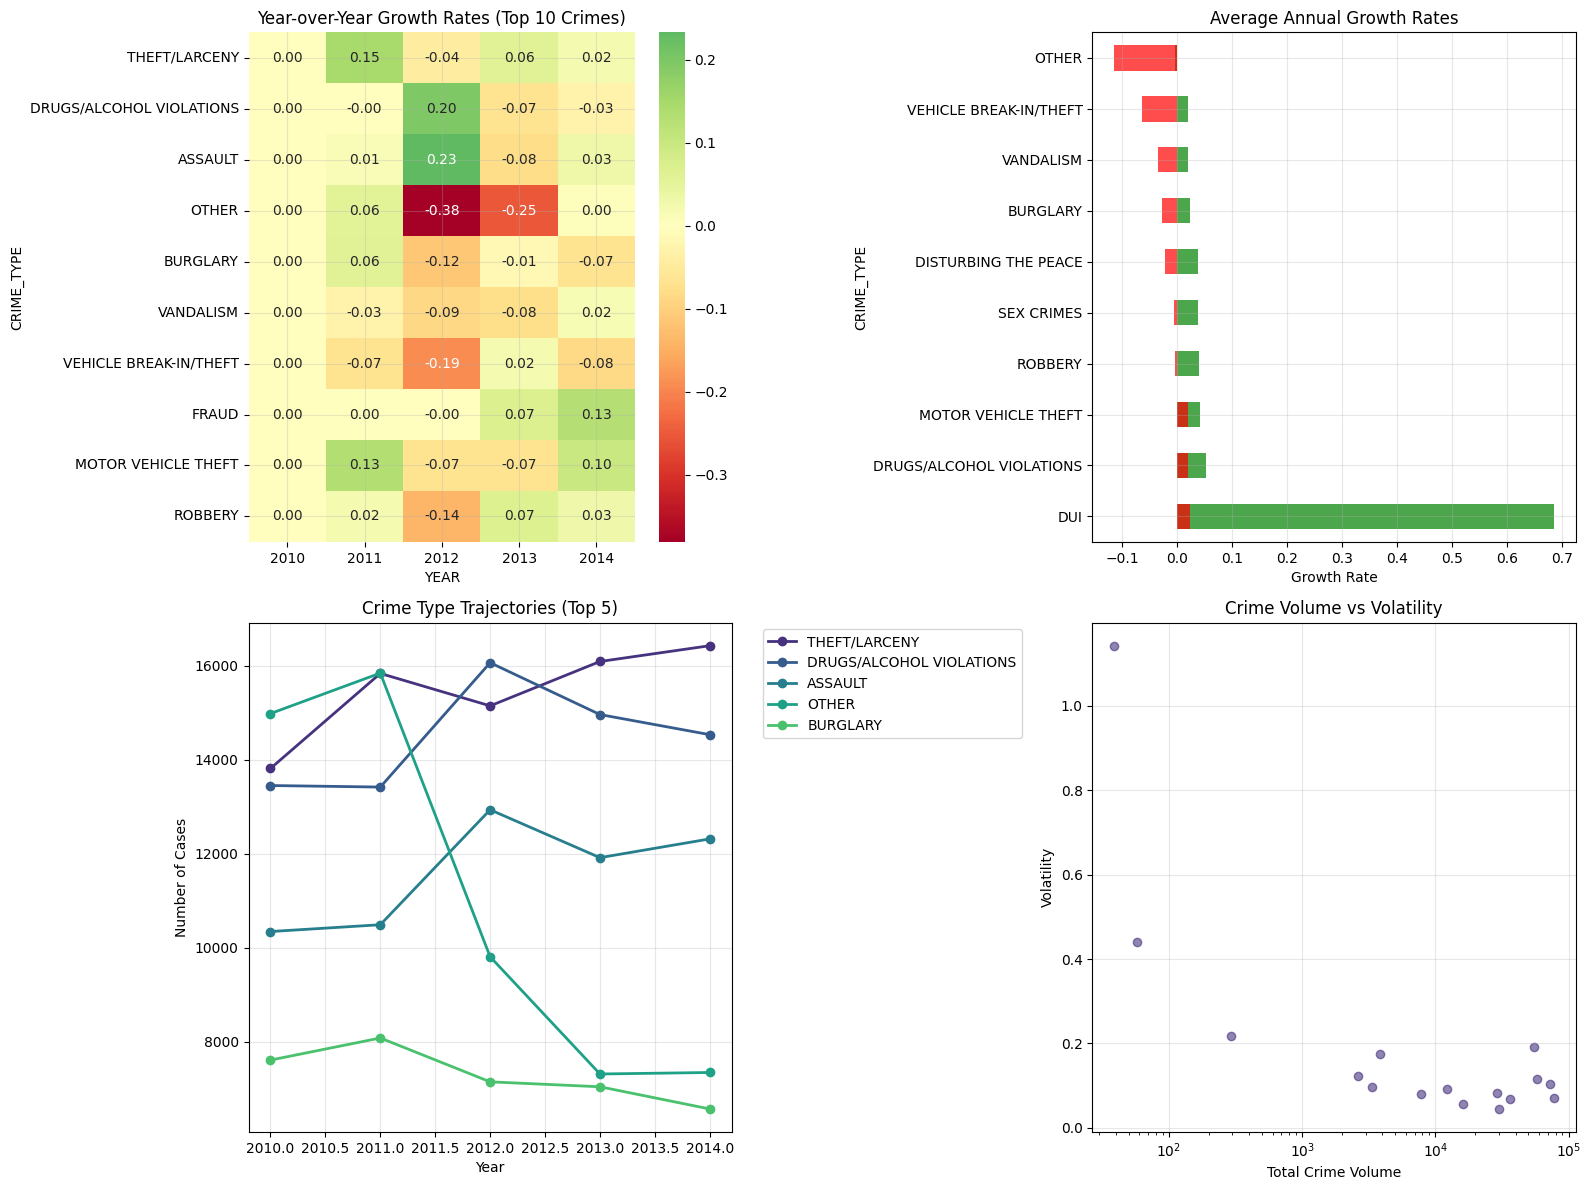

In [9]:
def crime_pattern_mining(combined_data):
    print("\n" + "="*60)
    print("CRIME PATTERN MINING")
    print("="*60)

    # Crime type evolution analysis
    if 'YEAR' in combined_data.columns and 'CRIME_TYPE' in combined_data.columns:
        # Create pivot table
        crime_year_pivot = combined_data.groupby(['YEAR', 'CRIME_TYPE']).size().unstack(fill_value=0)

        # Calculate year-over-year growth rates
        growth_rates = crime_year_pivot.pct_change(axis=0).fillna(0)

        # Find fastest growing and declining crime types
        avg_growth = growth_rates.mean().sort_values(ascending=False)

        print("Crime type trends (average annual growth rate):")
        print("\nFastest growing crime types:")
        for crime, rate in avg_growth.head(8).items():
            print(f"  {crime}: {rate*100:+.1f}% per year")

        print("\nFastest declining crime types:")
        for crime, rate in avg_growth.tail(8).items():
            print(f"  {crime}: {rate*100:+.1f}% per year")

        # Volatility analysis
        volatility = growth_rates.std().sort_values(ascending=False)
        print(f"\nMost volatile crime types (highest year-to-year variation):")
        for crime, vol in volatility.head(8).items():
            print(f"  {crime}: {vol*100:.1f}% volatility")

        # Visualizations
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

        # Growth rates heatmap
        top_crimes = combined_data['CRIME_TYPE'].value_counts().head(10).index
        growth_subset = growth_rates[top_crimes].T
        sns.heatmap(growth_subset, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=ax1)
        ax1.set_title('Year-over-Year Growth Rates (Top 10 Crimes)')

        # Average growth rates
        avg_growth.head(10).plot(kind='barh', ax=ax2, color='green', alpha=0.7)
        avg_growth.tail(10).plot(kind='barh', ax=ax2, color='red', alpha=0.7)
        ax2.set_title('Average Annual Growth Rates')
        ax2.set_xlabel('Growth Rate')

        # Crime type trajectories
        top_5_crimes = combined_data['CRIME_TYPE'].value_counts().head(5).index
        for crime in top_5_crimes:
            ax3.plot(crime_year_pivot.index, crime_year_pivot[crime], marker='o', label=crime, linewidth=2)
        ax3.set_title('Crime Type Trajectories (Top 5)')
        ax3.set_xlabel('Year')
        ax3.set_ylabel('Number of Cases')
        ax3.legend(bbox_to_anchor=(1.05, 1))

        # Volatility vs Volume scatter
        crime_volumes = combined_data['CRIME_TYPE'].value_counts()
        volatility_volume = pd.DataFrame({
            'volume': crime_volumes,
            'volatility': volatility
        }).dropna()

        ax4.scatter(volatility_volume['volume'], volatility_volume['volatility'], alpha=0.6)
        ax4.set_xlabel('Total Crime Volume')
        ax4.set_ylabel('Volatility')
        ax4.set_title('Crime Volume vs Volatility')
        ax4.set_xscale('log')

        plt.tight_layout()
        plt.show()

        return crime_year_pivot, growth_rates

crime_patterns = crime_pattern_mining(combined_data)

**Reporting Behavior Analysis**


REPORTING BEHAVIOR ANALYSIS
Reporting delay analysis (400,683 cases):
Average delay: 96.9 hours (4.0 days)
Median delay: 0.7 hours (0.0 days)
90th percentile: 92.8 hours

Reporting delay distribution:
  1-24hr: 108,604 (27.1%)
  <1hr: 86,705 (21.6%)
  1-7days: 47,717 (11.9%)
  1-30days: 16,818 (4.2%)
  >30days: 11,927 (3.0%)

Fastest reported crimes (>50 cases):
  HOMICIDE: 72.9h avg, 0.9h median
  OTHER: 91.7h avg, 0.6h median
  VANDALISM: 92.5h avg, 0.7h median
  VEHICLE BREAK-IN/THEFT: 93.0h avg, 0.7h median
  THEFT/LARCENY: 94.7h avg, 0.7h median
  WEAPONS: 94.9h avg, 0.6h median
  ROBBERY: 95.8h avg, 0.6h median
  DISTURBING THE PEACE: 97.0h avg, 0.7h median

Slowest reported crimes (>50 cases):
  DISTURBING THE PEACE: 97.0h avg, 0.7h median
  MOTOR VEHICLE THEFT: 98.2h avg, 0.7h median
  ASSAULT: 98.4h avg, 0.7h median
  BURGLARY: 99.4h avg, 0.7h median
  SEX CRIMES: 101.6h avg, 0.6h median
  DRUGS/ALCOHOL VIOLATIONS: 102.3h avg, 0.7h median
  FRAUD: 104.3h avg, 0.7h median
  DU

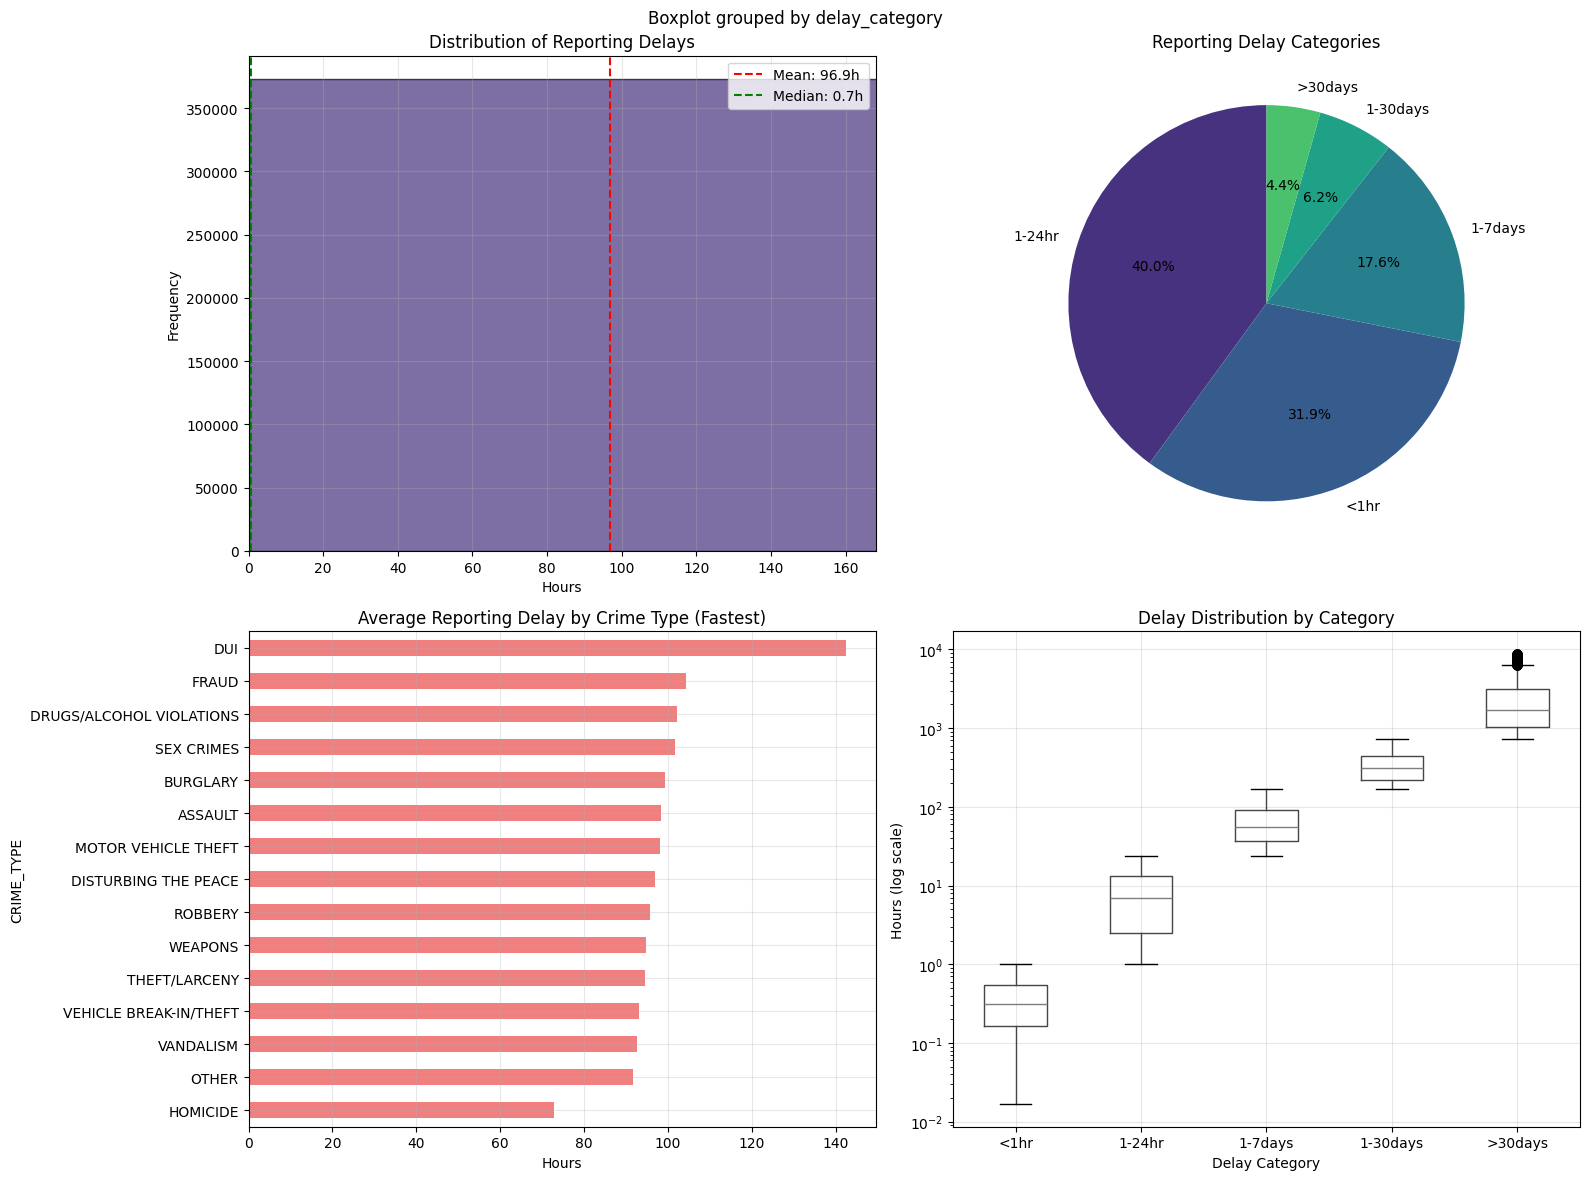

In [10]:
def reporting_behavior_analysis(yearly_data):
    print("\n" + "="*60)
    print("REPORTING BEHAVIOR ANALYSIS")
    print("="*60)

    all_delays = []

    for year, data in yearly_data.items():
        if 'DATE_REPORTED' not in data.columns or 'DATE_OCCURED' not in data.columns:
            continue

        clean_data = data.dropna(subset=['DATE_REPORTED', 'DATE_OCCURED']).copy()
        delays = []

        for _, row in clean_data.iterrows():
            try:
                reported = pd.to_datetime(row['DATE_REPORTED'])
                occurred = pd.to_datetime(row['DATE_OCCURED'])
                delay_hours = (reported - occurred).total_seconds() / 3600
                if 0 <= delay_hours <= 8760:  # Within reasonable range
                    delays.append(delay_hours)
            except:
                continue

        if delays:
            clean_data = clean_data.iloc[:len(delays)].copy()
            clean_data['delay_hours'] = delays
            clean_data['delay_category'] = pd.cut(
                clean_data['delay_hours'],
                bins=[0, 1, 24, 168, 720, float('inf')],
                labels=['<1hr', '1-24hr', '1-7days', '1-30days', '>30days']
            )
            all_delays.append(clean_data)

    if not all_delays:
        print("No valid delay data found")
        return

    delay_data = pd.concat(all_delays, ignore_index=True)

    # Overall reporting statistics
    print(f"Reporting delay analysis ({len(delay_data):,} cases):")
    delay_stats = delay_data['delay_hours'].describe()
    print(f"Average delay: {delay_stats['mean']:.1f} hours ({delay_stats['mean']/24:.1f} days)")
    print(f"Median delay: {delay_stats['50%']:.1f} hours ({delay_stats['50%']/24:.1f} days)")
    print(f"90th percentile: {delay_stats['90%'] if '90%' in delay_stats else np.percentile(delay_data['delay_hours'], 90):.1f} hours")

    # Delay categories
    category_dist = delay_data['delay_category'].value_counts()
    print(f"\nReporting delay distribution:")
    for category, count in category_dist.items():
        percentage = (count / len(delay_data)) * 100
        print(f"  {category}: {count:,} ({percentage:.1f}%)")

    # Crime type delay analysis
    crime_delays = delay_data.groupby('CRIME_TYPE')['delay_hours'].agg(['count', 'mean', 'median']).round(2)
    crime_delays = crime_delays[crime_delays['count'] >= 50].sort_values('mean')  # Min 50 cases

    print(f"\nFastest reported crimes (>50 cases):")
    for crime, stats in crime_delays.head(8).iterrows():
        print(f"  {crime}: {stats['mean']:.1f}h avg, {stats['median']:.1f}h median")

    print(f"\nSlowest reported crimes (>50 cases):")
    for crime, stats in crime_delays.tail(8).iterrows():
        print(f"  {crime}: {stats['mean']:.1f}h avg, {stats['median']:.1f}h median")

    # Advanced analysis
    # Immediate reporting rate (within 1 hour)
    immediate_rate = (delay_data['delay_hours'] <= 1).mean() * 100
    same_day_rate = (delay_data['delay_hours'] <= 24).mean() * 100

    print(f"\nReporting speed metrics:")
    print(f"Immediate reporting rate (<1hr): {immediate_rate:.1f}%")
    print(f"Same-day reporting rate (<24hr): {same_day_rate:.1f}%")

    # Visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Delay distribution
    delay_data['delay_hours'].hist(bins=50, ax=ax1, edgecolor='black', alpha=0.7)
    ax1.axvline(delay_stats['mean'], color='red', linestyle='--', label=f'Mean: {delay_stats["mean"]:.1f}h')
    ax1.axvline(delay_stats['50%'], color='green', linestyle='--', label=f'Median: {delay_stats["50%"]:.1f}h')
    ax1.set_title('Distribution of Reporting Delays')
    ax1.set_xlabel('Hours')
    ax1.set_ylabel('Frequency')
    ax1.legend()
    ax1.set_xlim(0, 168)  # Focus on first week

    # Category distribution
    category_dist.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Reporting Delay Categories')
    ax2.set_ylabel('')

    # Crime type delays (top 15)
    crime_delays.head(15)['mean'].plot(kind='barh', ax=ax3, color='lightcoral')
    ax3.set_title('Average Reporting Delay by Crime Type (Fastest)')
    ax3.set_xlabel('Hours')

    # Box plot by delay category
    delay_data.boxplot(column='delay_hours', by='delay_category', ax=ax4)
    ax4.set_title('Delay Distribution by Category')
    ax4.set_xlabel('Delay Category')
    ax4.set_ylabel('Hours (log scale)')
    ax4.set_yscale('log')

    plt.tight_layout()
    plt.show()

    return delay_data

delay_analysis = reporting_behavior_analysis(yearly_data)

**Statistical Significance Testing**


STATISTICAL SIGNIFICANCE TESTING
Testing year-over-year changes for significance...
Significant trends detected:

All trend results:
  THEFT/LARCENY: increasing (p=0.0864) 
  DRUGS/ALCOHOL VIOLATIONS: increasing (p=0.8065) 
  ASSAULT: increasing (p=0.2207) 
  OTHER: decreasing (p=0.2207) 
  BURGLARY: decreasing (p=0.0864) 
  VANDALISM: decreasing (p=0.0864) 
  VEHICLE BREAK-IN/THEFT: decreasing (p=0.0864) 
  FRAUD: increasing (p=0.1416) 
  MOTOR VEHICLE THEFT: increasing (p=1.0000) 
  ROBBERY: decreasing (p=0.8065) 

Geographic distribution test:
  Chi-square statistic: 753719.96
  P-value: 0.00e+00
  Result: Non-uniform distribution

Additional Statistical Tests:
  Crime Type vs Year Independence Test:
    Chi-square: 7460.97
    P-value: 0.0000
    Degrees of freedom: 28
    Result: Dependent


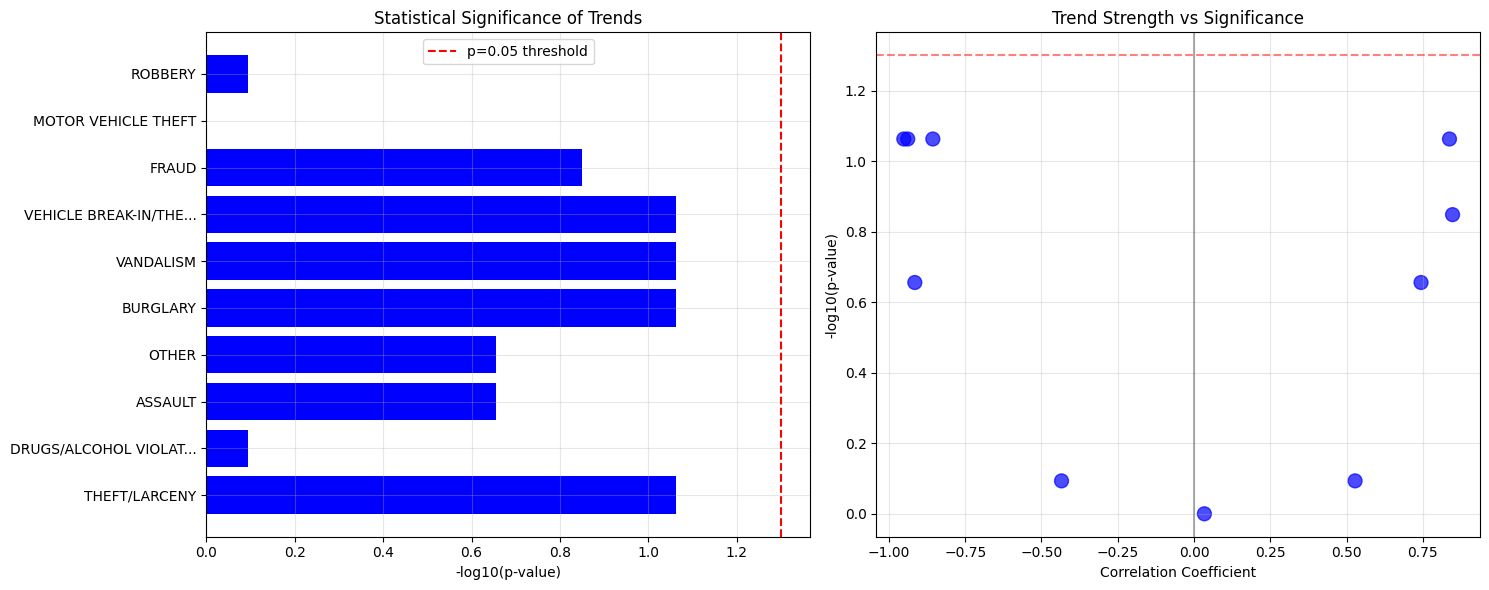

In [11]:
def statistical_testing(combined_data):
    print("\n" + "="*60)
    print("STATISTICAL SIGNIFICANCE TESTING")
    print("="*60)

    if 'YEAR' not in combined_data.columns or 'CRIME_TYPE' not in combined_data.columns:
        print("Required columns not found")
        return

    # Test for significant year-over-year changes
    years = sorted(combined_data['YEAR'].unique())
    top_crimes = combined_data['CRIME_TYPE'].value_counts().head(10).index

    print("Testing year-over-year changes for significance...")

    significant_changes = []

    for crime in top_crimes:
        crime_data = combined_data[combined_data['CRIME_TYPE'] == crime]
        yearly_counts = crime_data['YEAR'].value_counts().sort_index()

        # Use different statistical tests
        if len(yearly_counts) > 2:
            # Calculate trend direction using correlation
            correlation, corr_p = stats.pearsonr(yearly_counts.index, yearly_counts.values)

            # Use Kruskal-Wallis test for differences across years
            # Create lists of years for each crime occurrence
            year_lists = []
            for year in yearly_counts.index:
                year_list = [year] * yearly_counts[year]
                year_lists.extend(year_list)

            # Mann-Kendall test for trend (simplified)
            # Count concordant and discordant pairs
            n = len(yearly_counts)
            s_statistic = 0
            for i in range(n-1):
                for j in range(i+1, n):
                    if yearly_counts.iloc[j] > yearly_counts.iloc[i]:
                        s_statistic += 1
                    elif yearly_counts.iloc[j] < yearly_counts.iloc[i]:
                        s_statistic -= 1

            # Calculate variance (simplified for no ties)
            var_s = n * (n - 1) * (2 * n + 5) / 18

            # Z-statistic
            if s_statistic > 0:
                z_stat = (s_statistic - 1) / np.sqrt(var_s)
            elif s_statistic < 0:
                z_stat = (s_statistic + 1) / np.sqrt(var_s)
            else:
                z_stat = 0

            # Two-tailed p-value
            p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

            significant_changes.append({
                'crime': crime,
                'trend_p': p_value,
                'correlation': correlation,
                'corr_p': corr_p,
                'trend': 'increasing' if correlation > 0 else 'decreasing',
                'significant': p_value < 0.05,
                's_statistic': s_statistic
            })

    print("Significant trends detected:")
    for change in significant_changes:
        if change['significant']:
            print(f"  {change['crime']}: {change['trend']} trend (p={change['trend_p']:.4f})")

    print("\nAll trend results:")
    for change in significant_changes:
        sig_marker = "***" if change['significant'] else ""
        print(f"  {change['crime']}: {change['trend']} (p={change['trend_p']:.4f}) {sig_marker}")

    # Test geographic concentration using proper chi-square
    if 'ZIP_CODE' in combined_data.columns:
        zip_counts = combined_data['ZIP_CODE'].value_counts()

        # Test against uniform distribution
        total_crimes = zip_counts.sum()
        num_zips = len(zip_counts)
        expected_per_zip = total_crimes / num_zips

        # Use goodness of fit test
        try:
            chi2_geo, p_geo = stats.chisquare(zip_counts.values)

            print(f"\nGeographic distribution test:")
            print(f"  Chi-square statistic: {chi2_geo:.2f}")
            print(f"  P-value: {p_geo:.2e}")
            print(f"  Result: {'Non-uniform' if p_geo < 0.05 else 'Uniform'} distribution")

        except ValueError:
            # Alternative: Use Kolmogorov-Smirnov test
            from scipy.stats import kstest

            # Test against uniform distribution
            uniform_sample = np.random.uniform(0, 1, len(zip_counts))
            normalized_counts = (zip_counts.values - zip_counts.min()) / (zip_counts.max() - zip_counts.min())

            ks_stat, ks_p = kstest(normalized_counts, 'uniform')

            print(f"\nGeographic distribution test (K-S):")
            print(f"  K-S statistic: {ks_stat:.4f}")
            print(f"  P-value: {ks_p:.4f}")
            print(f"  Result: {'Non-uniform' if ks_p < 0.05 else 'Uniform'} distribution")

    # Additional statistical tests
    print(f"\nAdditional Statistical Tests:")

    # Test for independence between crime type and year
    if len(years) > 1:
        crime_year_crosstab = pd.crosstab(combined_data['CRIME_TYPE'], combined_data['YEAR'])

        # Select top crimes to avoid sparse matrix issues
        top_crimes_subset = combined_data['CRIME_TYPE'].value_counts().head(8).index
        crosstab_subset = crime_year_crosstab.loc[top_crimes_subset]

        try:
            chi2_indep, p_indep, dof, expected = stats.chi2_contingency(crosstab_subset)

            print(f"  Crime Type vs Year Independence Test:")
            print(f"    Chi-square: {chi2_indep:.2f}")
            print(f"    P-value: {p_indep:.4f}")
            print(f"    Degrees of freedom: {dof}")
            print(f"    Result: {'Dependent' if p_indep < 0.05 else 'Independent'}")

        except ValueError as e:
            print(f"  Independence test failed: {str(e)}")

    # Visualize statistical results
    if significant_changes:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # P-values plot
        crimes = [change['crime'] for change in significant_changes]
        p_values = [change['trend_p'] for change in significant_changes]
        correlations = [change['correlation'] for change in significant_changes]

        colors = ['red' if p < 0.05 else 'blue' for p in p_values]

        ax1.barh(range(len(crimes)), [-np.log10(p) for p in p_values], color=colors)
        ax1.axvline(-np.log10(0.05), color='red', linestyle='--', label='p=0.05 threshold')
        ax1.set_yticks(range(len(crimes)))
        ax1.set_yticklabels([crime[:20] + '...' if len(crime) > 20 else crime for crime in crimes])
        ax1.set_xlabel('-log10(p-value)')
        ax1.set_title('Statistical Significance of Trends')
        ax1.legend()

        # Correlation vs significance
        ax2.scatter(correlations, [-np.log10(p) for p in p_values],
                   c=['red' if p < 0.05 else 'blue' for p in p_values], s=100, alpha=0.7)
        ax2.axhline(-np.log10(0.05), color='red', linestyle='--', alpha=0.5)
        ax2.axvline(0, color='black', linestyle='-', alpha=0.3)
        ax2.set_xlabel('Correlation Coefficient')
        ax2.set_ylabel('-log10(p-value)')
        ax2.set_title('Trend Strength vs Significance')

        # Add labels for significant points
        for i, change in enumerate(significant_changes):
            if change['significant']:
                ax2.annotate(change['crime'][:10],
                           (correlations[i], -np.log10(p_values[i])),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)

        plt.tight_layout()
        plt.show()

    return significant_changes

statistical_results = statistical_testing(combined_data)

**Crime Hotspot Analysis**


CRIME HOTSPOT ANALYSIS
Identified 9 crime hotspots (top 10% of ZIP codes)
Hotspots account for 164,219 crimes (40.6%)

Hotspot characteristics:
Top crime types in hotspots:
  1. DRUGS/ALCOHOL VIOLATIONS: 32,549 (19.8% of hotspot crimes, 44.9% of all DRUGS/ALCOHOL VIOLATIONS)
  2. THEFT/LARCENY: 30,917 (18.8% of hotspot crimes, 40.0% of all THEFT/LARCENY)
  3. ASSAULT: 27,693 (16.9% of hotspot crimes, 47.7% of all ASSAULT)
  4. OTHER: 19,307 (11.8% of hotspot crimes, 34.9% of all OTHER)
  5. BURGLARY: 15,683 (9.6% of hotspot crimes, 43.0% of all BURGLARY)
  6. VANDALISM: 12,395 (7.5% of hotspot crimes, 41.5% of all VANDALISM)
  7. VEHICLE BREAK-IN/THEFT: 8,188 (5.0% of hotspot crimes, 28.1% of all VEHICLE BREAK-IN/THEFT)
  8. MOTOR VEHICLE THEFT: 5,384 (3.3% of hotspot crimes, 44.2% of all MOTOR VEHICLE THEFT)

Hotspot temporal trends:
  2010: 8,515 crimes (10.3% of year total)
  2011: 42,787 crimes (49.7% of year total)
  2012: 40,968 crimes (50.3% of year total)
  2013: 38,145 crimes

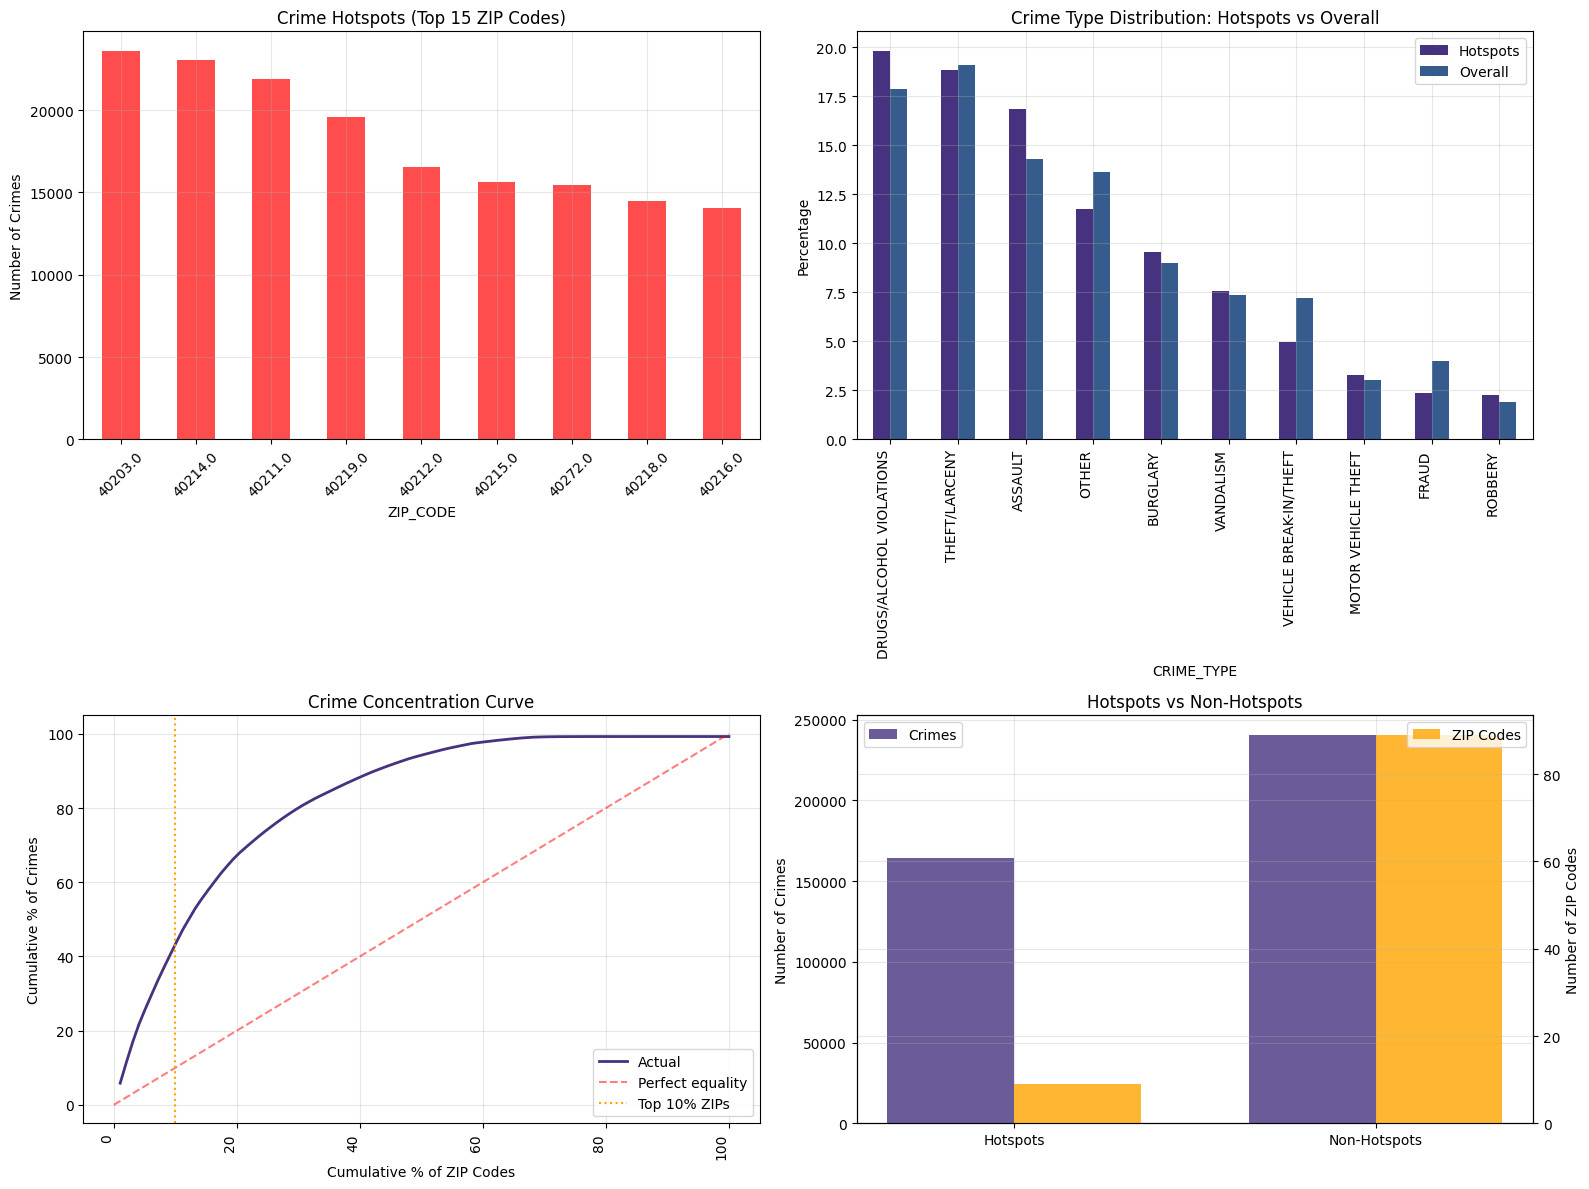

In [12]:
def hotspot_analysis(combined_data):
    print("\n" + "="*60)
    print("CRIME HOTSPOT ANALYSIS")
    print("="*60)

    if 'ZIP_CODE' not in combined_data.columns:
        print("ZIP_CODE column required")
        return

    # Define hotspots (top 10% of ZIP codes by crime count)
    zip_counts = combined_data['ZIP_CODE'].value_counts()
    hotspot_threshold = int(len(zip_counts) * 0.1)
    hotspots = zip_counts.head(hotspot_threshold)

    print(f"Identified {len(hotspots)} crime hotspots (top 10% of ZIP codes)")
    print(f"Hotspots account for {hotspots.sum():,} crimes ({hotspots.sum()/len(combined_data)*100:.1f}%)")

    # Hotspot characteristics
    hotspot_data = combined_data[combined_data['ZIP_CODE'].isin(hotspots.index)]

    print(f"\nHotspot characteristics:")
    hotspot_crimes = hotspot_data['CRIME_TYPE'].value_counts()
    print("Top crime types in hotspots:")
    for i, (crime, count) in enumerate(hotspot_crimes.head(8).items(), 1):
        pct_in_hotspots = (count / hotspot_data.shape[0]) * 100
        pct_of_total_crime = (count / combined_data[combined_data['CRIME_TYPE'] == crime].shape[0]) * 100
        print(f"  {i}. {crime}: {count:,} ({pct_in_hotspots:.1f}% of hotspot crimes, {pct_of_total_crime:.1f}% of all {crime})")

    # Temporal patterns in hotspots
    if 'YEAR' in combined_data.columns:
        hotspot_yearly = hotspot_data['YEAR'].value_counts().sort_index()
        print(f"\nHotspot temporal trends:")
        for year, count in hotspot_yearly.items():
            total_year = combined_data[combined_data['YEAR'] == year].shape[0]
            pct = (count / total_year) * 100
            print(f"  {year}: {count:,} crimes ({pct:.1f}% of year total)")

    # Visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Hotspot crime distribution
    hotspots.head(15).plot(kind='bar', ax=ax1, color='red', alpha=0.7)
    ax1.set_title('Crime Hotspots (Top 15 ZIP Codes)')
    ax1.set_ylabel('Number of Crimes')
    ax1.tick_params(axis='x', rotation=45)

    # Crime types in hotspots vs overall
    overall_crimes = combined_data['CRIME_TYPE'].value_counts()
    comparison_crimes = hotspot_crimes.head(10).index

    comparison_data = pd.DataFrame({
        'Hotspots': hotspot_crimes[comparison_crimes] / len(hotspot_data) * 100,
        'Overall': overall_crimes[comparison_crimes] / len(combined_data) * 100
    })

    comparison_data.plot(kind='bar', ax=ax2)
    ax2.set_title('Crime Type Distribution: Hotspots vs Overall')
    ax2.set_ylabel('Percentage')
    ax2.tick_params(axis='x', rotation=90)
    ax2.set_xticklabels(ax2.get_xticklabels(), ha='right')
    ax2.legend()

    # Hotspot concentration
    cumulative_crimes = zip_counts.cumsum()
    cumulative_pct = cumulative_crimes / len(combined_data) * 100
    zip_pct = np.arange(1, len(cumulative_pct) + 1) / len(cumulative_pct) * 100

    ax3.plot(zip_pct, cumulative_pct, linewidth=2, label='Actual')
    ax3.plot([0, 100], [0, 100], 'r--', alpha=0.5, label='Perfect equality')
    ax3.axvline(10, color='orange', linestyle=':', label='Top 10% ZIPs')
    ax3.set_title('Crime Concentration Curve')
    ax3.tick_params(axis='x', rotation=90)
    ax3.set_xticklabels(ax3.get_xticklabels(), ha='right')
    ax3.set_xlabel('Cumulative % of ZIP Codes')
    ax3.set_ylabel('Cumulative % of Crimes')
    ax3.legend()

    # Hotspot vs non-hotspot comparison
    non_hotspot_data = combined_data[~combined_data['ZIP_CODE'].isin(hotspots.index)]

    categories = ['Hotspots', 'Non-Hotspots']
    crime_counts = [len(hotspot_data), len(non_hotspot_data)]
    zip_counts_cat = [len(hotspots), len(zip_counts) - len(hotspots)]

    x = np.arange(len(categories))
    width = 0.35

    ax4.bar(x - width/2, crime_counts, width, label='Crimes', alpha=0.8)
    ax4_twin = ax4.twinx()
    ax4_twin.bar(x + width/2, zip_counts_cat, width, label='ZIP Codes', alpha=0.8, color='orange')

    ax4.set_title('Hotspots vs Non-Hotspots')
    ax4.set_xticks(x)
    ax4.set_xticklabels(categories)
    ax4.set_ylabel('Number of Crimes')
    ax4_twin.set_ylabel('Number of ZIP Codes')
    ax4.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    return hotspots, hotspot_data

hotspot_results = hotspot_analysis(combined_data)

**Predictive Modeling Preparation**


PREDICTIVE MODELING PREPARATION
Identified features:
  Categorical: ['UOR_DESC', 'CRIME_TYPE', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP', 'LMPD_DIVISION', 'LMPD_BEAT', 'PREMISE_TYPE', 'BLOCK_ADDRESS', 'CITY', 'ZIP_CODE']
  Numerical: ['ID', 'YEAR', 'month']

Feature correlations (top pairs):
  YEAR - year_normalized: 1.000
  ID - year_normalized: 0.883
  ID - YEAR: 0.883

Data quality for modeling:
  Total samples: 404,883
  Features with >10% missing data:

Sample sizes by crime type (top 10):
  THEFT/LARCENY: 77,317 samples
  DRUGS/ALCOHOL VIOLATIONS: 72,432 samples
  ASSAULT: 58,004 samples
  OTHER: 55,295 samples
  BURGLARY: 36,449 samples
  VANDALISM: 29,860 samples
  VEHICLE BREAK-IN/THEFT: 29,110 samples
  FRAUD: 16,193 samples
  MOTOR VEHICLE THEFT: 12,174 samples
  ROBBERY: 7,806 samples


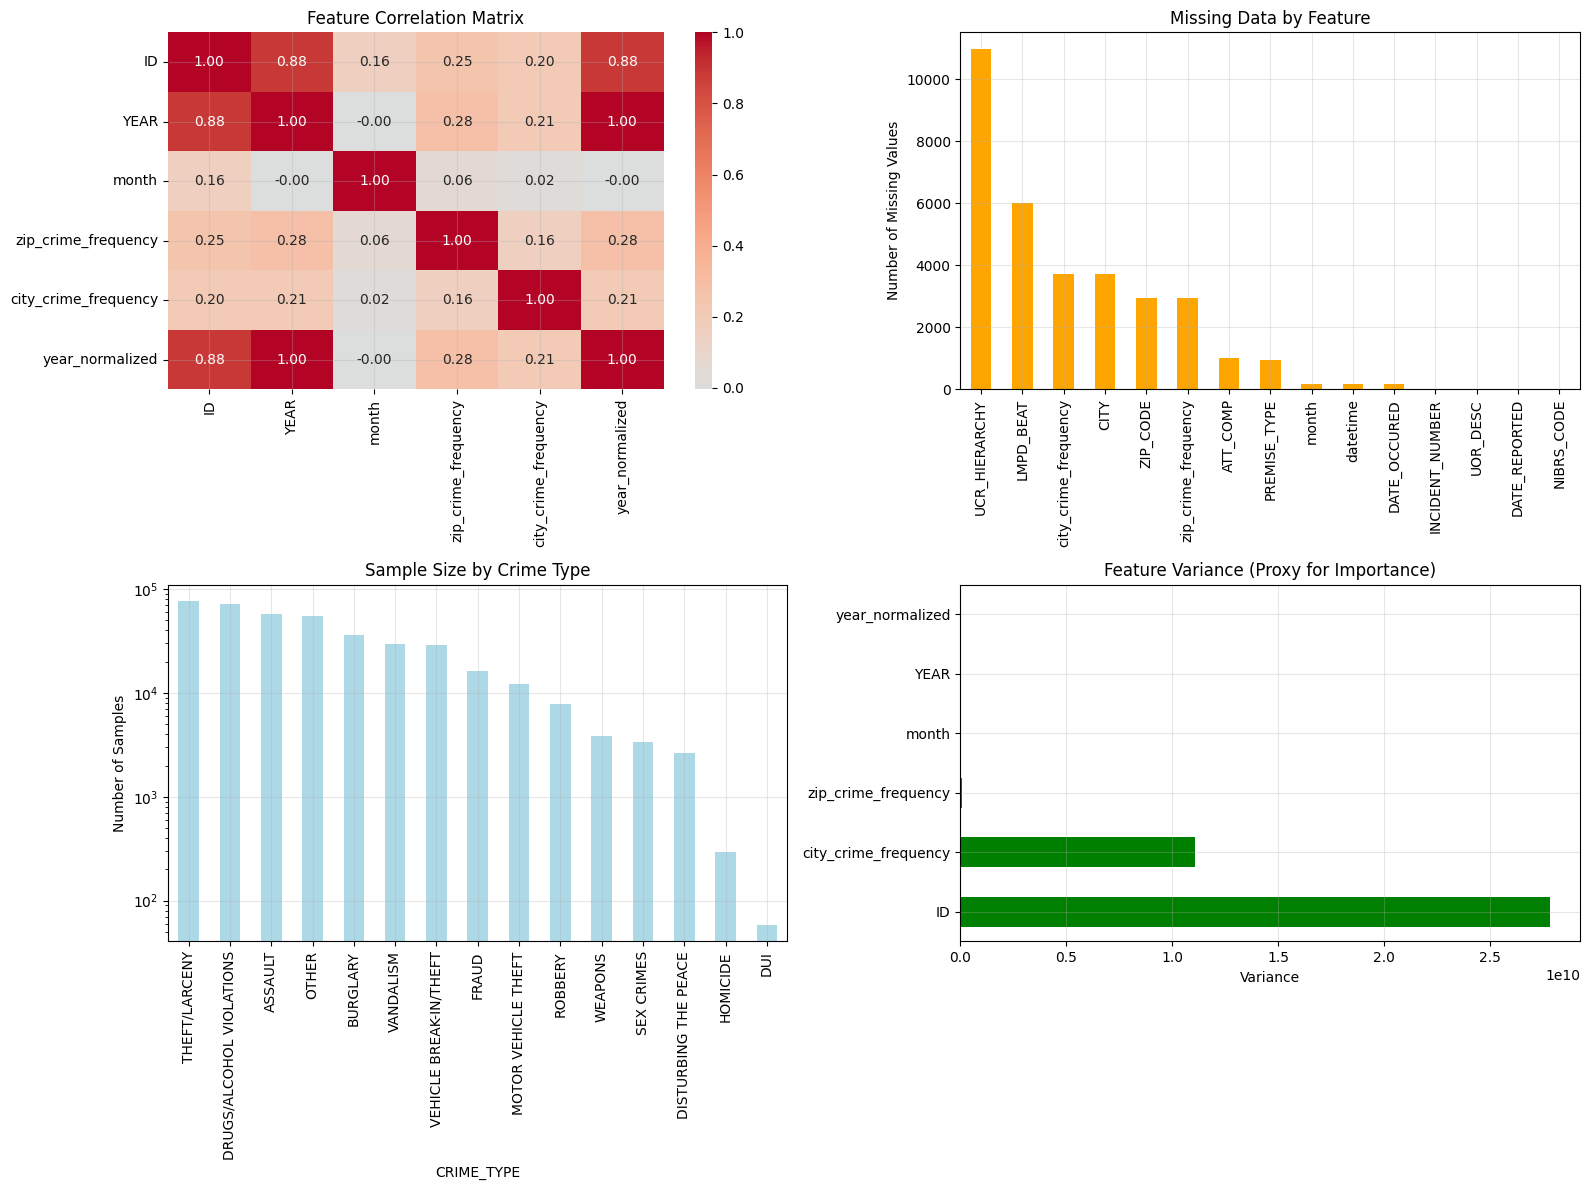

In [17]:
def predictive_modeling_prep(combined_data):
    print("\n" + "="*60)
    print("PREDICTIVE MODELING PREPARATION")
    print("="*60)

    # Feature engineering
    modeling_data = combined_data.copy()

    # Encode categorical variables
    categorical_features = []
    numerical_features = []

    for col in modeling_data.columns:
        if modeling_data[col].dtype == 'object':
            unique_ratio = modeling_data[col].nunique() / len(modeling_data)
            if unique_ratio < 0.3:  # Less than 30% unique values
                categorical_features.append(col)
        elif modeling_data[col].dtype in ['int64', 'float64']:
            numerical_features.append(col)

    print(f"Identified features:")
    print(f"  Categorical: {categorical_features}")
    print(f"  Numerical: {numerical_features}")

    # Create crime frequency encoding
    if 'ZIP_CODE' in modeling_data.columns:
        zip_crime_freq = modeling_data['ZIP_CODE'].value_counts()
        modeling_data['zip_crime_frequency'] = modeling_data['ZIP_CODE'].map(zip_crime_freq)
        numerical_features.append('zip_crime_frequency')

    if 'CITY' in modeling_data.columns:
        city_crime_freq = modeling_data['CITY'].value_counts()
        modeling_data['city_crime_frequency'] = modeling_data['CITY'].map(city_crime_freq)
        numerical_features.append('city_crime_frequency')

    # Temporal features
    if 'YEAR' in modeling_data.columns:
        modeling_data['year_normalized'] = (modeling_data['YEAR'] - modeling_data['YEAR'].min()) / (modeling_data['YEAR'].max() - modeling_data['YEAR'].min())
        numerical_features.append('year_normalized')

    # Crime type encoding (target variable preparation)
    if 'CRIME_TYPE' in modeling_data.columns:
        crime_type_encoding = {crime: idx for idx, crime in enumerate(modeling_data['CRIME_TYPE'].unique())}
        modeling_data['crime_type_encoded'] = modeling_data['CRIME_TYPE'].map(crime_type_encoding)

    # Feature correlation analysis
    if len(numerical_features) > 1:
        correlation_matrix = modeling_data[numerical_features].corr()

        print(f"\nFeature correlations (top pairs):")
        # Get upper triangle of correlation matrix
        upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

        # Find highly correlated pairs
        high_corr_pairs = []
        for column in upper_tri.columns:
            for index in upper_tri.index:
                corr_val = upper_tri.loc[index, column]
                if not pd.isna(corr_val) and abs(corr_val) > 0.5:
                    high_corr_pairs.append((index, column, corr_val))

        high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
        for feat1, feat2, corr in high_corr_pairs[:8]:
            print(f"  {feat1} - {feat2}: {corr:.3f}")

    # Data quality for modeling
    missing_pct = modeling_data.isnull().sum() / len(modeling_data) * 100
    print(f"\nData quality for modeling:")
    print(f"  Total samples: {len(modeling_data):,}")
    print(f"  Features with >10% missing data:")
    high_missing = missing_pct[missing_pct > 10]
    for col, pct in high_missing.items():
        print(f"    {col}: {pct:.1f}% missing")

    # Sample size by crime type
    crime_sample_sizes = modeling_data['CRIME_TYPE'].value_counts()
    print(f"\nSample sizes by crime type (top 10):")
    for crime, count in crime_sample_sizes.head(10).items():
        print(f"  {crime}: {count:,} samples")

    # Visualizations
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # Feature correlation heatmap
    if len(numerical_features) > 1:
        corr_subset = correlation_matrix.iloc[:min(10, len(correlation_matrix)), :min(10, len(correlation_matrix))]
        sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax1)
        ax1.set_title('Feature Correlation Matrix')

    # Missing data pattern
    missing_data = modeling_data.isnull().sum().sort_values(ascending=False).head(15)
    missing_data.plot(kind='bar', ax=ax2, color='orange')
    ax2.set_title('Missing Data by Feature')
    ax2.set_ylabel('Number of Missing Values')
    ax2.tick_params(axis='x', rotation=90)

    # Crime type distribution (for class balance)
    crime_sample_sizes.head(15).plot(kind='bar', ax=ax3, color='lightblue')
    ax3.set_title('Sample Size by Crime Type')
    ax3.tick_params(axis='x', rotation=90)
    ax3.set_ylabel('Number of Samples')
    ax3.set_yscale('log')

    # Feature importance proxy (variance)
    if numerical_features:
        feature_variance = modeling_data[numerical_features].var().sort_values(ascending=False)
        feature_variance.head(10).plot(kind='barh', ax=ax4, color='green')
        ax4.set_title('Feature Variance (Proxy for Importance)')
        ax4.set_xlabel('Variance')

    plt.tight_layout()
    plt.show()

    return modeling_data, categorical_features, numerical_features

modeling_data, cat_features, num_features = predictive_modeling_prep(combined_data)

**Advanced Visualization Dashboard**


COMPREHENSIVE DASHBOARD


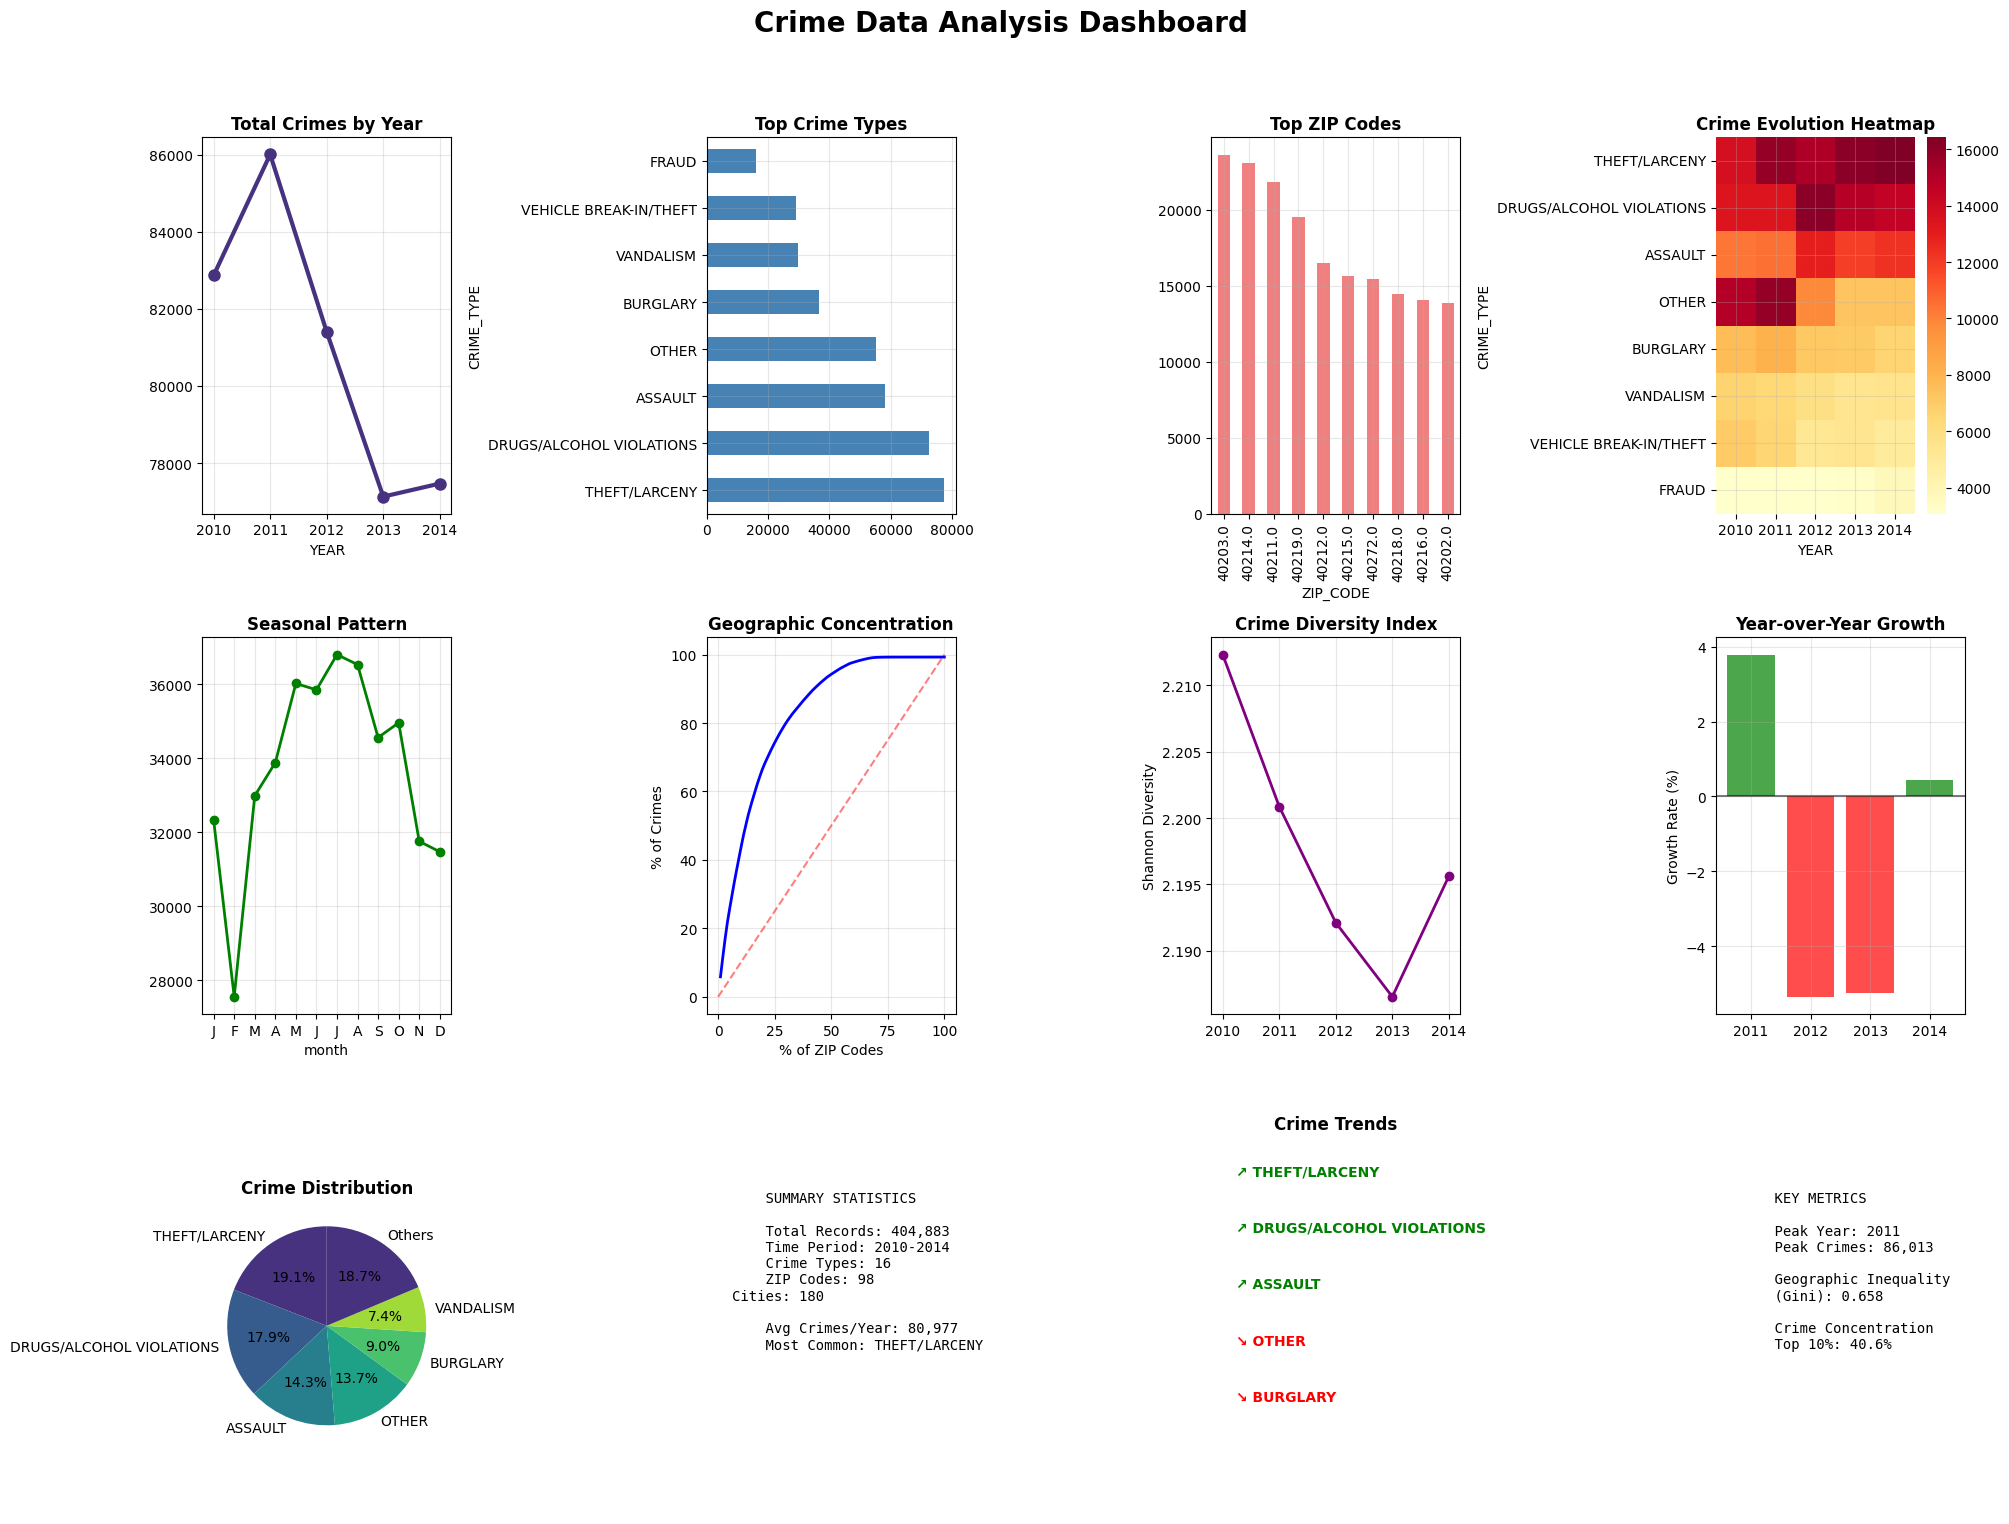

In [22]:
def create_dashboard(combined_data):
    print("\n" + "="*60)
    print("COMPREHENSIVE DASHBOARD")
    print("="*60)

    # Create a comprehensive dashboard
    fig = plt.figure(figsize=(20, 16))

    # Crime trends over time
    ax1 = plt.subplot(3, 4, 1)
    yearly_crimes = combined_data['YEAR'].value_counts().sort_index()
    yearly_crimes.plot(kind='line', marker='o', linewidth=3, markersize=8, ax=ax1)
    ax1.set_title('Total Crimes by Year', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Top crime types
    ax2 = plt.subplot(3, 4, 2)
    top_crimes = combined_data['CRIME_TYPE'].value_counts().head(8)
    top_crimes.plot(kind='barh', ax=ax2, color='steelblue')
    ax2.set_title('Top Crime Types', fontweight='bold')

    # Geographic distribution
    ax3 = plt.subplot(3, 4, 3)
    if 'ZIP_CODE' in combined_data.columns:
        zip_crimes = combined_data['ZIP_CODE'].value_counts().head(10)
        zip_crimes.plot(kind='bar', ax=ax3, color='lightcoral')
        ax3.set_title('Top ZIP Codes', fontweight='bold')
        ax3.tick_params(axis='x', rotation=90)

    # Crime type evolution heatmap
    ax4 = plt.subplot(3, 4, 4)
    crime_year_pivot = combined_data.groupby(['YEAR', 'CRIME_TYPE']).size().unstack(fill_value=0)
    top_crimes_for_heatmap = combined_data['CRIME_TYPE'].value_counts().head(8).index
    heatmap_data = crime_year_pivot[top_crimes_for_heatmap].T
    sns.heatmap(heatmap_data, annot=False, cmap='YlOrRd', ax=ax4)
    ax4.set_title('Crime Evolution Heatmap', fontweight='bold')

    # Seasonal patterns (if temporal data available)
    ax5 = plt.subplot(3, 4, 5)
    if 'DATE_OCCURED' in combined_data.columns:
        try:
            combined_data['month'] = pd.to_datetime(combined_data['DATE_OCCURED'], errors='coerce').dt.month
            monthly_crimes = combined_data['month'].value_counts().sort_index()
            monthly_crimes.plot(kind='line', marker='o', ax=ax5, color='green', linewidth=2)
            ax5.set_title('Seasonal Pattern', fontweight='bold')
            ax5.set_xticks(range(1, 13))
            ax5.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])
        except:
            ax5.text(0.5, 0.5, 'Temporal data\nnot available', ha='center', va='center', transform=ax5.transAxes)
            ax5.set_title('Seasonal Pattern', fontweight='bold')

    # Crime concentration
    ax6 = plt.subplot(3, 4, 6)
    if 'ZIP_CODE' in combined_data.columns:
        zip_counts = combined_data['ZIP_CODE'].value_counts()
        cumulative_crimes = zip_counts.cumsum()
        cumulative_pct = cumulative_crimes / len(combined_data) * 100
        zip_pct = np.arange(1, len(cumulative_pct) + 1) / len(cumulative_pct) * 100

        ax6.plot(zip_pct, cumulative_pct, linewidth=2, color='blue')
        ax6.plot([0, 100], [0, 100], 'r--', alpha=0.5)
        ax6.set_title('Geographic Concentration', fontweight='bold')
        ax6.set_xlabel('% of ZIP Codes')
        ax6.set_ylabel('% of Crimes')

    # Crime diversity index
    ax7 = plt.subplot(3, 4, 7)
    yearly_diversity = []
    for year in sorted(combined_data['YEAR'].unique()):
        year_data = combined_data[combined_data['YEAR'] == year]
        crime_dist = year_data['CRIME_TYPE'].value_counts()
        # Shannon diversity index
        proportions = crime_dist / crime_dist.sum()
        shannon_diversity = -(proportions * np.log(proportions)).sum()
        yearly_diversity.append(shannon_diversity)

    ax7.plot(sorted(combined_data['YEAR'].unique()), yearly_diversity, marker='o', linewidth=2, color='purple')
    ax7.set_title('Crime Diversity Index', fontweight='bold')
    ax7.set_ylabel('Shannon Diversity')

    # Growth rates
    ax8 = plt.subplot(3, 4, 8)
    growth_rates = yearly_crimes.pct_change().dropna() * 100
    colors = ['red' if x < 0 else 'green' for x in growth_rates]
    ax8.bar(growth_rates.index, growth_rates.values, color=colors, alpha=0.7)
    ax8.set_title('Year-over-Year Growth', fontweight='bold')
    ax8.set_ylabel('Growth Rate (%)')
    ax8.axhline(y=0, color='black', linestyle='-', alpha=0.5)

    # Crime type pie chart
    ax9 = plt.subplot(3, 4, 9)
    crime_types = combined_data['CRIME_TYPE'].value_counts()
    top_6_crimes = crime_types.head(6)
    others = crime_types.iloc[6:].sum()
    pie_data = list(top_6_crimes.values) + [others]
    pie_labels = list(top_6_crimes.index) + ['Others']
    ax9.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
    ax9.set_title('Crime Distribution', fontweight='bold')

    # Statistical summary
    ax10 = plt.subplot(3, 4, 10)
    ax10.axis('off')
    stats_text = f"""
    SUMMARY STATISTICS

    Total Records: {len(combined_data):,}
    Time Period: {combined_data['YEAR'].min()}-{combined_data['YEAR'].max()}
    Crime Types: {combined_data['CRIME_TYPE'].nunique()}
    """

    if 'ZIP_CODE' in combined_data.columns:
        stats_text += f"ZIP Codes: {combined_data['ZIP_CODE'].nunique()}\n"
    if 'CITY' in combined_data.columns:
        stats_text += f"Cities: {combined_data['CITY'].nunique()}\n"

    stats_text += f"""
    Avg Crimes/Year: {len(combined_data)/len(combined_data['YEAR'].unique()):,.0f}
    Most Common: {combined_data['CRIME_TYPE'].value_counts().index[0]}
    """

    ax10.text(0.1, 0.9, stats_text, transform=ax10.transAxes, fontsize=10,
              verticalalignment='top', fontfamily='monospace')

    # Trend indicators
    ax11 = plt.subplot(3, 4, 11)
    top_5_crimes = combined_data['CRIME_TYPE'].value_counts().head(5).index
    crime_year_pivot = combined_data.groupby(['YEAR', 'CRIME_TYPE']).size().unstack(fill_value=0)

    for crime in top_5_crimes:
        trend_data = crime_year_pivot[crime]
        correlation, _ = stats.pearsonr(trend_data.index, trend_data.values)

        if correlation > 0.3:
            trend_symbol = '↗'
            color = 'green'
        elif correlation < -0.3:
            trend_symbol = '↘'
            color = 'red'
        else:
            trend_symbol = '→'
            color = 'gray'

        ax11.text(0.1, 0.9 - (list(top_5_crimes).index(crime) * 0.15),
                  f"{trend_symbol} {crime}", transform=ax11.transAxes,
                  color=color, fontsize=10, fontweight='bold')

    ax11.set_title('Crime Trends', fontweight='bold')
    ax11.axis('off')

    # Performance metrics
    ax12 = plt.subplot(3, 4, 12)
    ax12.axis('off')

    # Calculate some key metrics
    total_crimes = len(combined_data)
    peak_year = yearly_crimes.idxmax()
    peak_crimes = yearly_crimes.max()

    if 'ZIP_CODE' in combined_data.columns:
        zip_counts = combined_data['ZIP_CODE'].value_counts()
        gini_coefficient = 2 * np.sum(np.arange(1, len(zip_counts) + 1) * zip_counts.sort_values()) / (len(zip_counts) * zip_counts.sum()) - (len(zip_counts) + 1) / len(zip_counts)
    else:
        gini_coefficient = 0

    metrics_text = f"""
    KEY METRICS

    Peak Year: {peak_year}
    Peak Crimes: {peak_crimes:,}

    Geographic Inequality
    (Gini): {gini_coefficient:.3f}

    Crime Concentration
    Top 10%: {(combined_data['ZIP_CODE'].value_counts().head(int(combined_data['ZIP_CODE'].nunique()*0.1)).sum()/total_crimes*100):.1f}%
    """ if 'ZIP_CODE' in combined_data.columns else "Metrics unavailable"

    ax12.text(0.1, 0.9, metrics_text, transform=ax12.transAxes, fontsize=10,
              verticalalignment='top', fontfamily='monospace')

    plt.suptitle('Crime Data Analysis Dashboard', fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

create_dashboard(combined_data)

**Executive Summary Report**

In [23]:
def generate_executive_summary(combined_data, yearly_data):
    print("\n" + "="*70)
    print("EXECUTIVE SUMMARY REPORT")
    print("="*70)

    # Key findings
    total_crimes = len(combined_data)
    years_analyzed = len(yearly_data)
    period = f"{min(yearly_data.keys())}-{max(yearly_data.keys())}"

    print(f"""
CRIME DATA ANALYSIS SUMMARY ({period})

OVERVIEW:
- Total criminal incidents analyzed: {total_crimes:,}
- Analysis period: {years_analyzed} years ({period})
- Average incidents per year: {total_crimes//years_analyzed:,}
- Unique crime types: {combined_data['CRIME_TYPE'].nunique()}
""")

    # Top insights
    top_crime = combined_data['CRIME_TYPE'].value_counts().index[0]
    top_crime_count = combined_data['CRIME_TYPE'].value_counts().iloc[0]
    top_crime_pct = (top_crime_count / total_crimes) * 100

    print(f"""
KEY FINDINGS:

1. MOST PREVALENT CRIME TYPE:
   {top_crime} accounts for {top_crime_count:,} incidents ({top_crime_pct:.1f}% of all crimes)

2. TEMPORAL PATTERNS:""")

    yearly_counts = combined_data['YEAR'].value_counts().sort_index()
    total_change = yearly_counts.iloc[-1] - yearly_counts.iloc[0]
    total_change_pct = (total_change / yearly_counts.iloc[0]) * 100
    trend_direction = "increased" if total_change > 0 else "decreased"

    print(f"   Overall trend: Crime {trend_direction} by {abs(total_change):,} incidents ({abs(total_change_pct):.1f}%)")
    print(f"   Peak year: {yearly_counts.idxmax()} with {yearly_counts.max():,} incidents")
    print(f"   Lowest year: {yearly_counts.idxmin()} with {yearly_counts.min():,} incidents")

    if 'ZIP_CODE' in combined_data.columns:
        zip_counts = combined_data['ZIP_CODE'].value_counts()
        top_zip = zip_counts.index[0]
        top_zip_count = zip_counts.iloc[0]
        top_zip_pct = (top_zip_count / total_crimes) * 100

        # Geographic concentration
        top_10_pct_zips = int(len(zip_counts) * 0.1)
        top_10_crimes = zip_counts.head(top_10_pct_zips).sum()
        concentration_pct = (top_10_crimes / total_crimes) * 100

        print(f"""
3. GEOGRAPHIC PATTERNS:
   Highest crime ZIP code: {top_zip} with {top_zip_count:,} incidents ({top_zip_pct:.1f}%)
   Geographic concentration: Top 10% of ZIP codes account for {concentration_pct:.1f}% of crimes
   Total ZIP codes affected: {len(zip_counts)}""")

    if 'CITY' in combined_data.columns:
        city_counts = combined_data['CITY'].value_counts()
        top_city = city_counts.index[0]
        top_city_count = city_counts.iloc[0]
        top_city_pct = (top_city_count / total_crimes) * 100

        print(f"""
4. CITY-LEVEL ANALYSIS:
   Highest crime city: {top_city} with {top_city_count:,} incidents ({top_city_pct:.1f}%)
   Cities affected: {len(city_counts)}""")

    # Crime diversity
    crime_counts = combined_data['CRIME_TYPE'].value_counts()
    top_5_pct = (crime_counts.head(5).sum() / total_crimes) * 100

    print(f"""
5. CRIME DIVERSITY:
   Top 5 crime types account for {top_5_pct:.1f}% of all incidents
   Crime distribution: {'Concentrated' if top_5_pct > 70 else 'Diverse'}""")

    # Recommendations
    print(f"""STRATEGIC RECOMMENDATIONS:

1. RESOURCE ALLOCATION:
   - Focus enforcement efforts on {top_crime} prevention
   - Prioritize top 10% of ZIP codes for intervention programs
   - Implement targeted strategies in {top_city if 'CITY' in combined_data.columns else 'high-crime areas'}

2. TREND MONITORING:
   - Continue tracking year-over-year changes
   - Monitor emerging crime types for early intervention
   - Assess effectiveness of current prevention strategies

3. DATA-DRIVEN INSIGHTS:
   - Implement predictive analytics for resource planning
   - Develop early warning systems for crime hotspots
   - Regular analysis updates to track intervention effectiveness

4. COMMUNITY ENGAGEMENT:
   - Target community programs in highest-impact areas
   - Develop crime prevention education focused on prevalent crime types
   - Establish partnerships with local organizations in hotspot areas
""")

    print("="*70)
    print("END OF ANALYSIS")
    print("="*70)

generate_executive_summary(combined_data, yearly_data)


EXECUTIVE SUMMARY REPORT

CRIME DATA ANALYSIS SUMMARY (2010-2014)

OVERVIEW:
- Total criminal incidents analyzed: 404,883
- Analysis period: 5 years (2010-2014)
- Average incidents per year: 80,976
- Unique crime types: 16


KEY FINDINGS:

1. MOST PREVALENT CRIME TYPE:
   THEFT/LARCENY accounts for 77,317 incidents (19.1% of all crimes)

2. TEMPORAL PATTERNS:
   Overall trend: Crime decreased by 5,405 incidents (6.5%)
   Peak year: 2011 with 86,013 incidents
   Lowest year: 2013 with 77,127 incidents

3. GEOGRAPHIC PATTERNS:
   Highest crime ZIP code: 40203.0 with 23,598 incidents (5.8%)
   Geographic concentration: Top 10% of ZIP codes account for 40.6% of crimes
   Total ZIP codes affected: 98

4. CITY-LEVEL ANALYSIS:
   Highest crime city: LOUISVILLE with 357,997 incidents (88.4%)
   Cities affected: 180

5. CRIME DIVERSITY:
   Top 5 crime types account for 74.0% of all incidents
   Crime distribution: Concentrated
STRATEGIC RECOMMENDATIONS:

1. RESOURCE ALLOCATION:
   - Focus enfo

**Export Results**

In [24]:
def export_results(combined_data, yearly_data):
    print("\n" + "="*60)
    print("EXPORTING ANALYSIS RESULTS")
    print("="*60)

    # Create summary statistics
    summary_stats = {
        'total_crimes': len(combined_data),
        'years_analyzed': len(yearly_data),
        'unique_crime_types': combined_data['CRIME_TYPE'].nunique(),
        'period': f"{min(yearly_data.keys())}-{max(yearly_data.keys())}"
    }

    if 'ZIP_CODE' in combined_data.columns:
        summary_stats['unique_zip_codes'] = combined_data['ZIP_CODE'].nunique()

    if 'CITY' in combined_data.columns:
        summary_stats['unique_cities'] = combined_data['CITY'].nunique()

    # Top crime types summary
    top_crimes_summary = combined_data['CRIME_TYPE'].value_counts().head(10).to_dict()

    # Yearly trends
    yearly_summary = combined_data['YEAR'].value_counts().sort_index().to_dict()

    print("Analysis complete! Key datasets prepared for export:")
    print(f"- Combined dataset: {len(combined_data):,} records")
    print(f"- Summary statistics: {len(summary_stats)} metrics")
    print(f"- Top crime types: {len(top_crimes_summary)} categories")
    print(f"- Yearly trends: {len(yearly_summary)} data points")

    if 'ZIP_CODE' in combined_data.columns:
        geographic_summary = combined_data['ZIP_CODE'].value_counts().head(20).to_dict()
        print(f"- Geographic summary: Top {len(geographic_summary)} ZIP codes")

    # Save key findings to variables for easy access
    analysis_results = {
        'summary_statistics': summary_stats,
        'top_crimes': top_crimes_summary,
        'yearly_trends': yearly_summary,
        'geographic_data': geographic_summary if 'ZIP_CODE' in combined_data.columns else None,
        'combined_dataset': combined_data,
        'yearly_datasets': yearly_data
    }

    print("\nAnalysis results stored in 'analysis_results' dictionary")
    print("Available keys:", list(analysis_results.keys()))

    # Display final summary table
    print(f"\n{'='*60}")
    print("FINAL ANALYSIS SUMMARY")
    print(f"{'='*60}")

    print(f"Total Crime Records: {summary_stats['total_crimes']:,}")
    print(f"Analysis Period: {summary_stats['period']}")
    print(f"Crime Categories: {summary_stats['unique_crime_types']}")

    if 'unique_zip_codes' in summary_stats:
        print(f"ZIP Codes: {summary_stats['unique_zip_codes']}")
    if 'unique_cities' in summary_stats:
        print(f"Cities: {summary_stats['unique_cities']}")

    print(f"\nTop 3 Crimes:")
    for i, (crime, count) in enumerate(list(top_crimes_summary.items())[:3], 1):
        pct = (count / summary_stats['total_crimes']) * 100
        print(f"  {i}. {crime}: {count:,} ({pct:.1f}%)")

    return analysis_results

# Run final export
final_results = export_results(combined_data, yearly_data)

print(f"\n COMPREHENSIVE CRIME DATA ANALYSIS COMPLETED!")
print(f"{len(combined_data):,} records analyzed across {len(yearly_data)} years")
print(f"{combined_data['CRIME_TYPE'].nunique()} different crime types examined")
print(f"{combined_data.get('ZIP_CODE', pd.Series()).nunique() if 'ZIP_CODE' in combined_data.columns else 'N/A'} geographic areas covered")
print(f"All analysis results saved in 'final_results' variable")


EXPORTING ANALYSIS RESULTS
Analysis complete! Key datasets prepared for export:
- Combined dataset: 404,883 records
- Summary statistics: 6 metrics
- Top crime types: 10 categories
- Yearly trends: 5 data points
- Geographic summary: Top 20 ZIP codes

Analysis results stored in 'analysis_results' dictionary
Available keys: ['summary_statistics', 'top_crimes', 'yearly_trends', 'geographic_data', 'combined_dataset', 'yearly_datasets']

FINAL ANALYSIS SUMMARY
Total Crime Records: 404,883
Analysis Period: 2010-2014
Crime Categories: 16
ZIP Codes: 98
Cities: 180

Top 3 Crimes:
  1. THEFT/LARCENY: 77,317 (19.1%)
  2. DRUGS/ALCOHOL VIOLATIONS: 72,432 (17.9%)
  3. ASSAULT: 58,004 (14.3%)

 COMPREHENSIVE CRIME DATA ANALYSIS COMPLETED!
404,883 records analyzed across 5 years
16 different crime types examined
98 geographic areas covered
All analysis results saved in 'final_results' variable
